## Zomato Restaurant

### Project Descriptiom

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

#### Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
- Country code
- Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies ��
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people


#### Problem statement:

In this dataset predict 2 things -
1. Average Cost for two
2. Price range

**Hint:** Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets

### Dataset Link

- https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
- https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading the datasets

In [2]:
# Loading the country codes
country_codes = pd.read_excel('Country-Code.xlsx')
country_codes

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

We have 15 countries with their codes. The Country Code column will be used to join the country names with the zomato restaurants dataset.

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='latin-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

From above we can observe a combination of numeric and categorical data. The Restaurant_ID is a nominal variable that has no quantitative value whatsoever.
The first target variable is Average Cost for two which has continuous numeric values. So, this is a regression task.
The next target variable is Price range, which is also numeric but is discrete. So it is a classification task.

### Merging the two datasets

In [4]:
df = df.merge(country_codes, on='Country Code', how='left')

In [5]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

### Exploratory Data Analysis

In [6]:
# Getting dimensions od the dataset
df.shape

(9551, 22)

The merged dataset consists of 9551 rows and 22 columns, out of which 2 columns are the target or output variables.

In [7]:
# Getting the column names
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

The independent variables are:<br>
'Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country'

The target variables are:<br>
'Average Cost for two', 'Price range'

In [8]:
# Checking datatype of each column
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

The dataset has object, int64 and float64 datatypes

In [9]:
# Checking for missing values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

As we can see, there are no missing values in the dataset, except cuisines which has 9 values missing. We can handle the missing values in the pre-processing stage.

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [11]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

From above, we can get an overview of the dataset. As observed before, there are a few missing values.
We need to remove all irrelevant columns in the data preprocessing stage.

In [12]:
# Number of unique values for each variable
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

There are several categorical as well as nominal variables in the dataset.<br>
Country Code, Country, City, Locality, Locality Verbose, Cuisines, Currency, Has Table booking, Has Online delivery, Is delivering now, Price range, Aggregate rating, Rating color, Rating text all seem to be categorical or discrete variables.<br>
Switch to order menu has only 1 value, so the column might be irrelevant.

In [13]:
# Frequency of occurence of each value in 'Country' column
df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

Majority of the restaurants (~90%) seem to be in India.

In [14]:
# Frequency of occurence of each value in 'City' column
df.City.value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

The most frequently occurring city is New Delhi. There are seceral cities that occur only once.

In [15]:
# Frequency of occurence of each value in 'Locality' column
df.Locality.value_counts()

Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: Locality, Length: 1208, dtype: int64

Connaught Place seems to be the most frequently occuring locality.

In [16]:
# Frequency of occurence of each value in 'Locality Verbose' column
df['Locality Verbose'].value_counts()

Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: Locality Verbose, Length: 1265, dtype: int64

Connaught Place, New Delhi seems to be the most frequently occuring locality. Locality Verbose seems to be a combination of City and Locality names.

In [17]:
# Frequency of occurence of each value in 'Cuisines' column
df.Cuisines.value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

North Indian cuisine seems to be the most popular cuisine.

In [18]:
# Frequency of occurence of each value in 'Currency' column
df.Currency.value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

Since most of the restaurants are in India, the most frequently observed currency value in Indian Rupees.

In [19]:
# Frequency of occurence of each value in 'Has Table booking' column
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

Majority of the restaurants don't have table booking.

In [20]:
# Frequency of occurence of each value in 'Has Online delivery' column
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

Again, most of the restaurants do not have online delivery.

In [21]:
# Frequency of occurence of each value in 'Is delivering now' column
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

It is observed that most of the restaurants are not delivering at the moment. Only 34 restaurants were found to be delivering.

In [22]:
# Frequency of occurence of each value in 'Price range' column
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

The price range is represented in numbers, where 1 seems to be the most frequently observed price range.

In [23]:
# Frequency of occurence of each value in 'Aggregate rating' column
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

The most frequently occurring rating seems to be 0, followed by 3.2 and 3.1

In [24]:
# Frequency of occurence of each value in 'Rating color' column
df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

The most frequently observed rating colour is Orange, while the least is Red.

In [25]:
# Frequency of occurence of each value in 'Rating text' column
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

The Rating text is dependent on the Rating colours. Orange means Average, while red means poor. We can observe the colours and text have same value counts for each category. 

### Data Preprocessing

In [26]:
# Dropping unnecessary columns
df.drop(columns=['Switch to order menu', 'Restaurant Name'],  inplace=True)
df.head()

Restaurant ID  Country Code              City  \
0        6317637           162       Makati City   
1        6304287           162       Makati City   
2        6300002           162  Mandaluyong City   
3        6318506           162  Mandaluyong City   
4        6314302           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes      Country  
0               4.8   Dark Green   Excellent    314  Phillipines  
1               4.5   Dark Green   Excellent    591  Phillipines  
2               4.4        Green   Very Good    270  Phillipines  
3               4.9   Dark Green   Excellent    365  Phillipines  
4               4.8   Dark Green   Excellent    229  Phillipines

In [27]:
# Handling the missing values
df['Cuisines'] = df.Cuisines.fillna(df.Cuisines.mode()[0])

In [28]:
df.isna().sum()

Restaurant ID           0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There are no missing values now.

#### Dataset description

In [29]:
# Statistical summary of columns (numerical data)
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

Observations from the statistical summary:
- Restaurant ID does not provide any quantitative value as it is just a unique identifier for the restaurant. Same goes for Country Code.
- The mean is less than the median for Longitude, Latitude, Price range, and Aggregate rating.
- The mean is greater than the median for Average Cost for two and Votes.
- Based on the 75% and max values, there seem to be several outliers as well.

In [30]:
# Categorical columns
cat_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_cols.append(i)
cat_cols

['City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text',
 'Country']

In [31]:
# Numerical columns
num_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        num_cols.append(i)
num_cols

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

#### Data Visualisation

In [32]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("Reds_r")*1000)

##### Univariate analysis

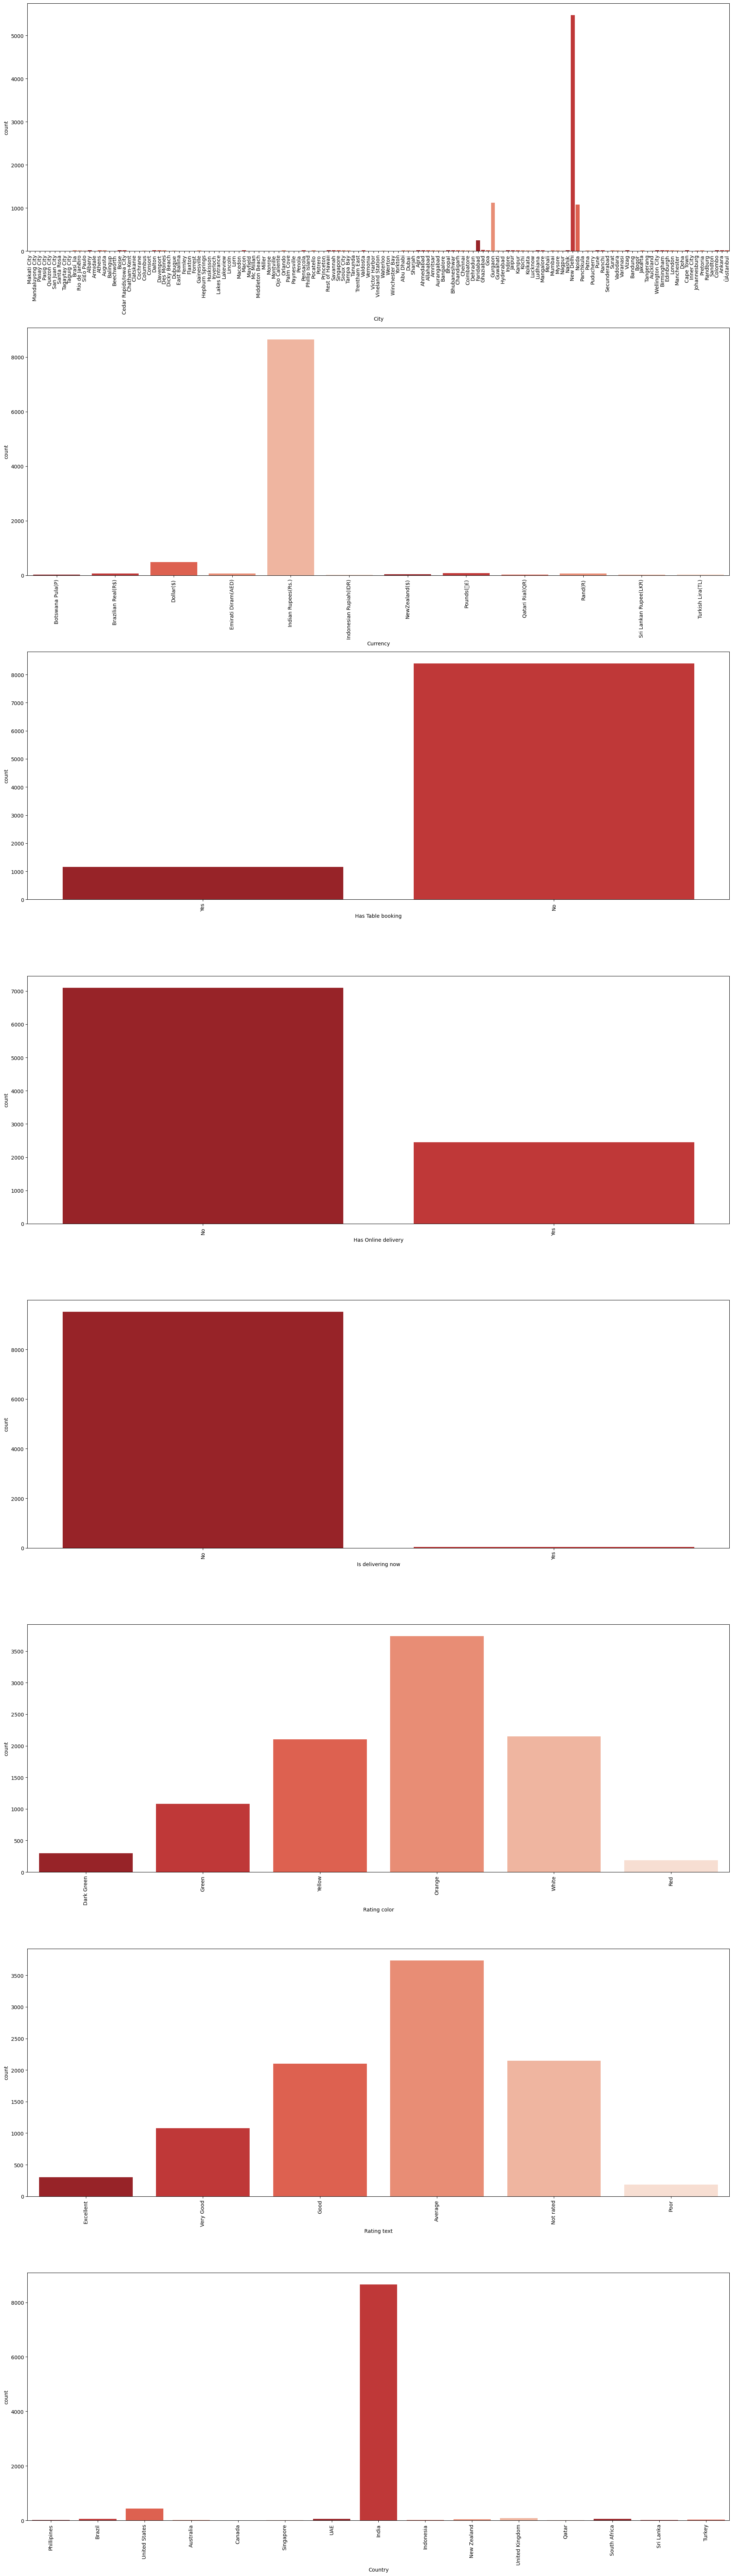

In [33]:
# For categorical columns
plt.figure(figsize=(20, 70))
plot_num = 1
for col in ['City', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']:
    if plot_num <= 8:
        ax = plt.subplot(8, 1, plot_num)
        sns.countplot(x = df[col])
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Observations are similar to what we saw in the value counts of these variables.
- Most frequently occurring City: New Delhi
- Most frequently occurring Currency: Indian Rupees(Rs.)
- Most frequently occurring value for Has Table Booking: No
- Most frequently occurring value for Has Online Delivery: No
- Most frequently occurring value for Is Delivering Now: No
- Most frequently occurring Rating color: Orange
- Most frequently occurring Rating text: Average
- Most frequently occurring Country: India

For the rest of the categorical variables, the number of classes seem to be very high. So we will only observe the to 50 classes.

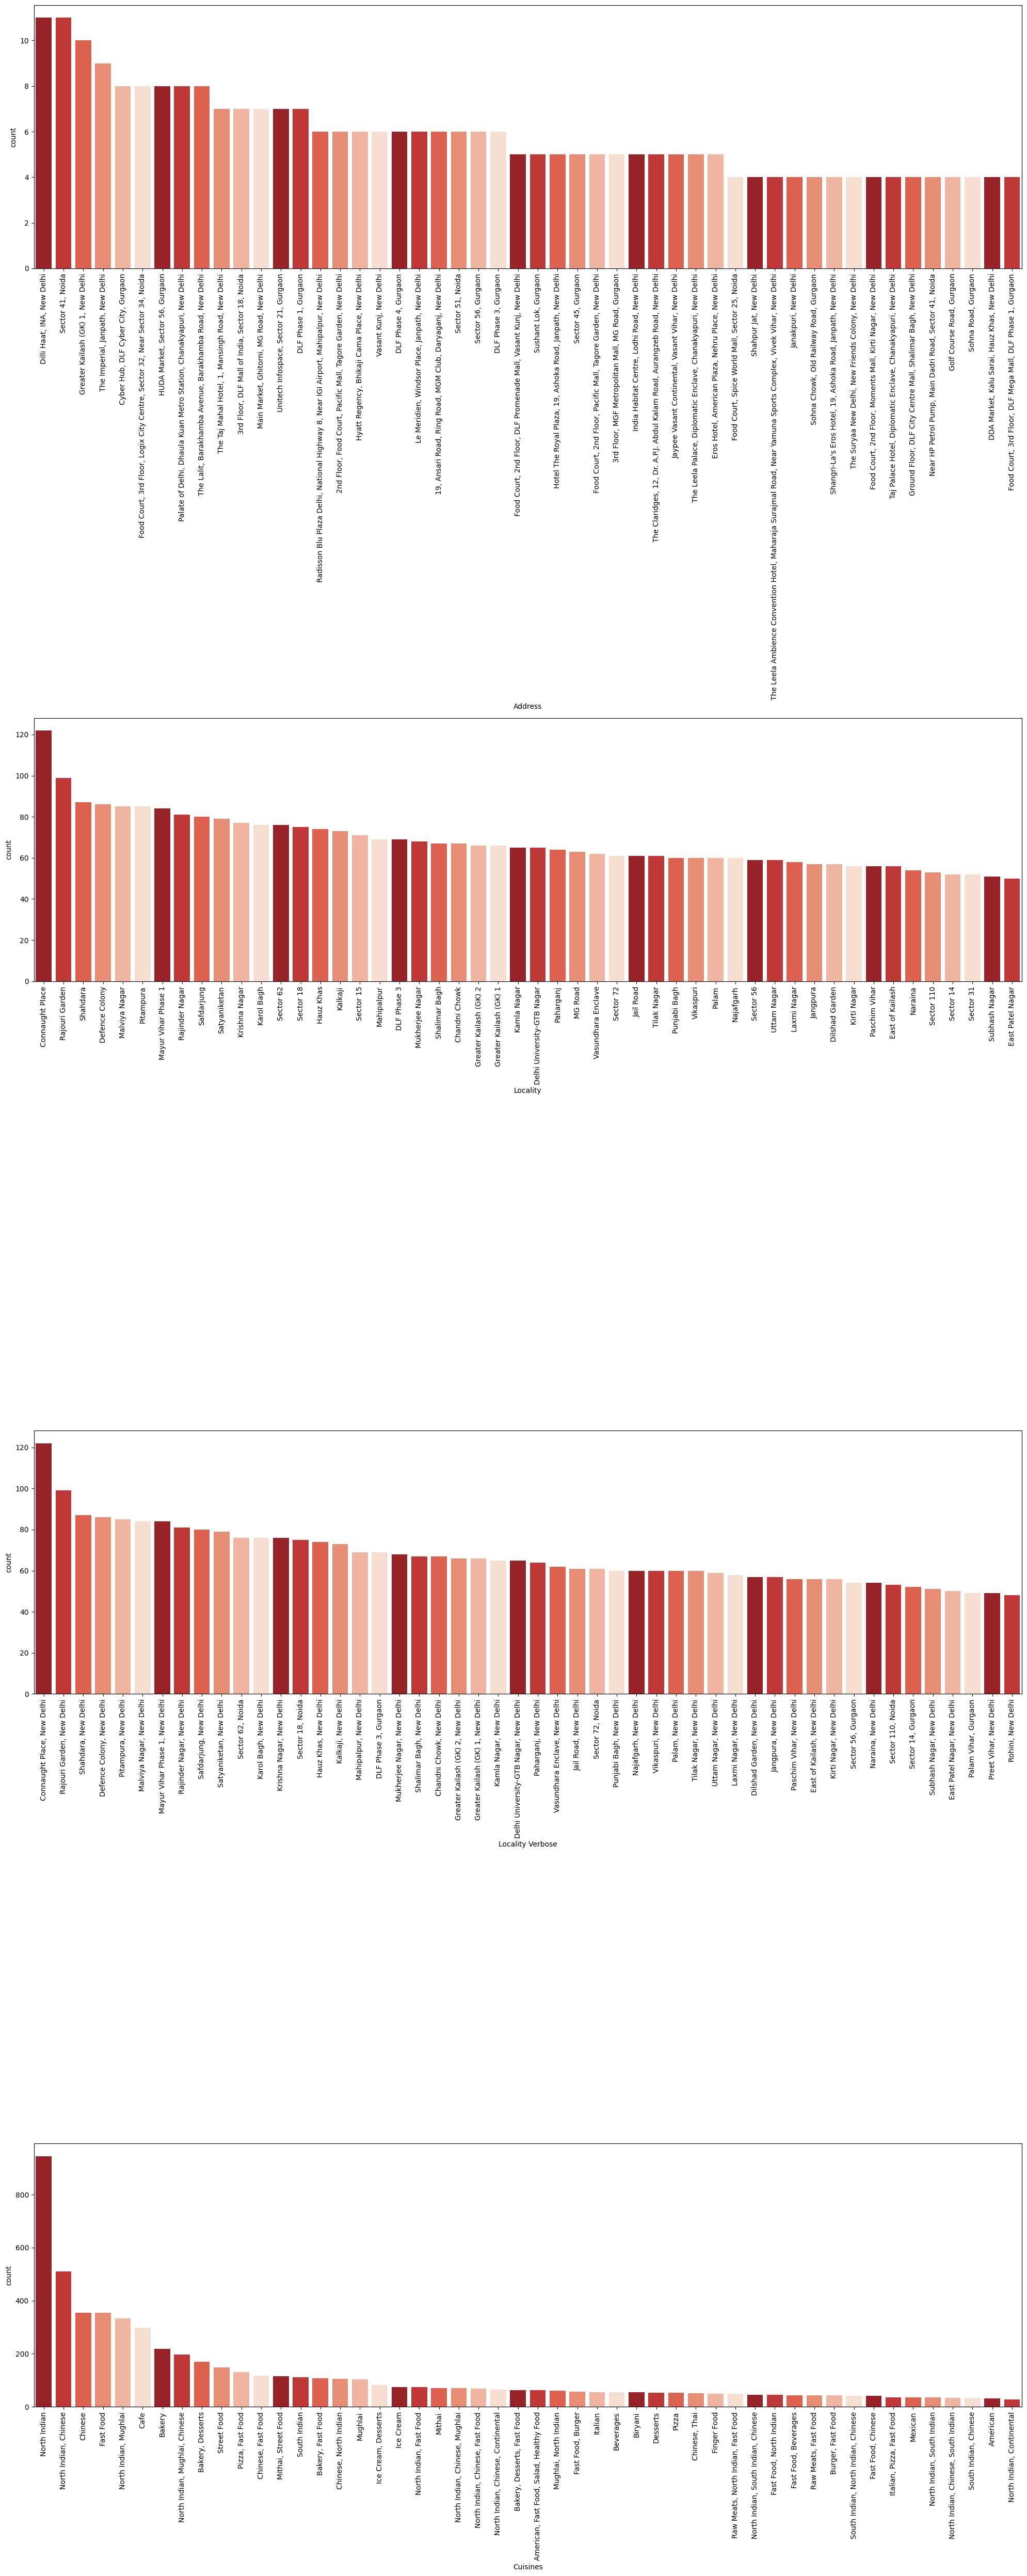

In [34]:
plt.figure(figsize=(20, 50))
plot_num = 1
for col in ['Address', 'Locality', 'Locality Verbose', 'Cuisines']:
    if plot_num <= 4:
        ax = plt.subplot(4, 1, plot_num)
        sns.countplot(x = df[col], order=df[col].value_counts().iloc[:50].index)
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

- Most frequently occurring Address: "Dilli Haat, INA, New Delhi", "Sector 41, Noida"
- Most frequently occurring Locality and Locality Verbode: Connaught Place and Connaught Place, New Delhi
- Most frequently occurring Cuisine: North Indian

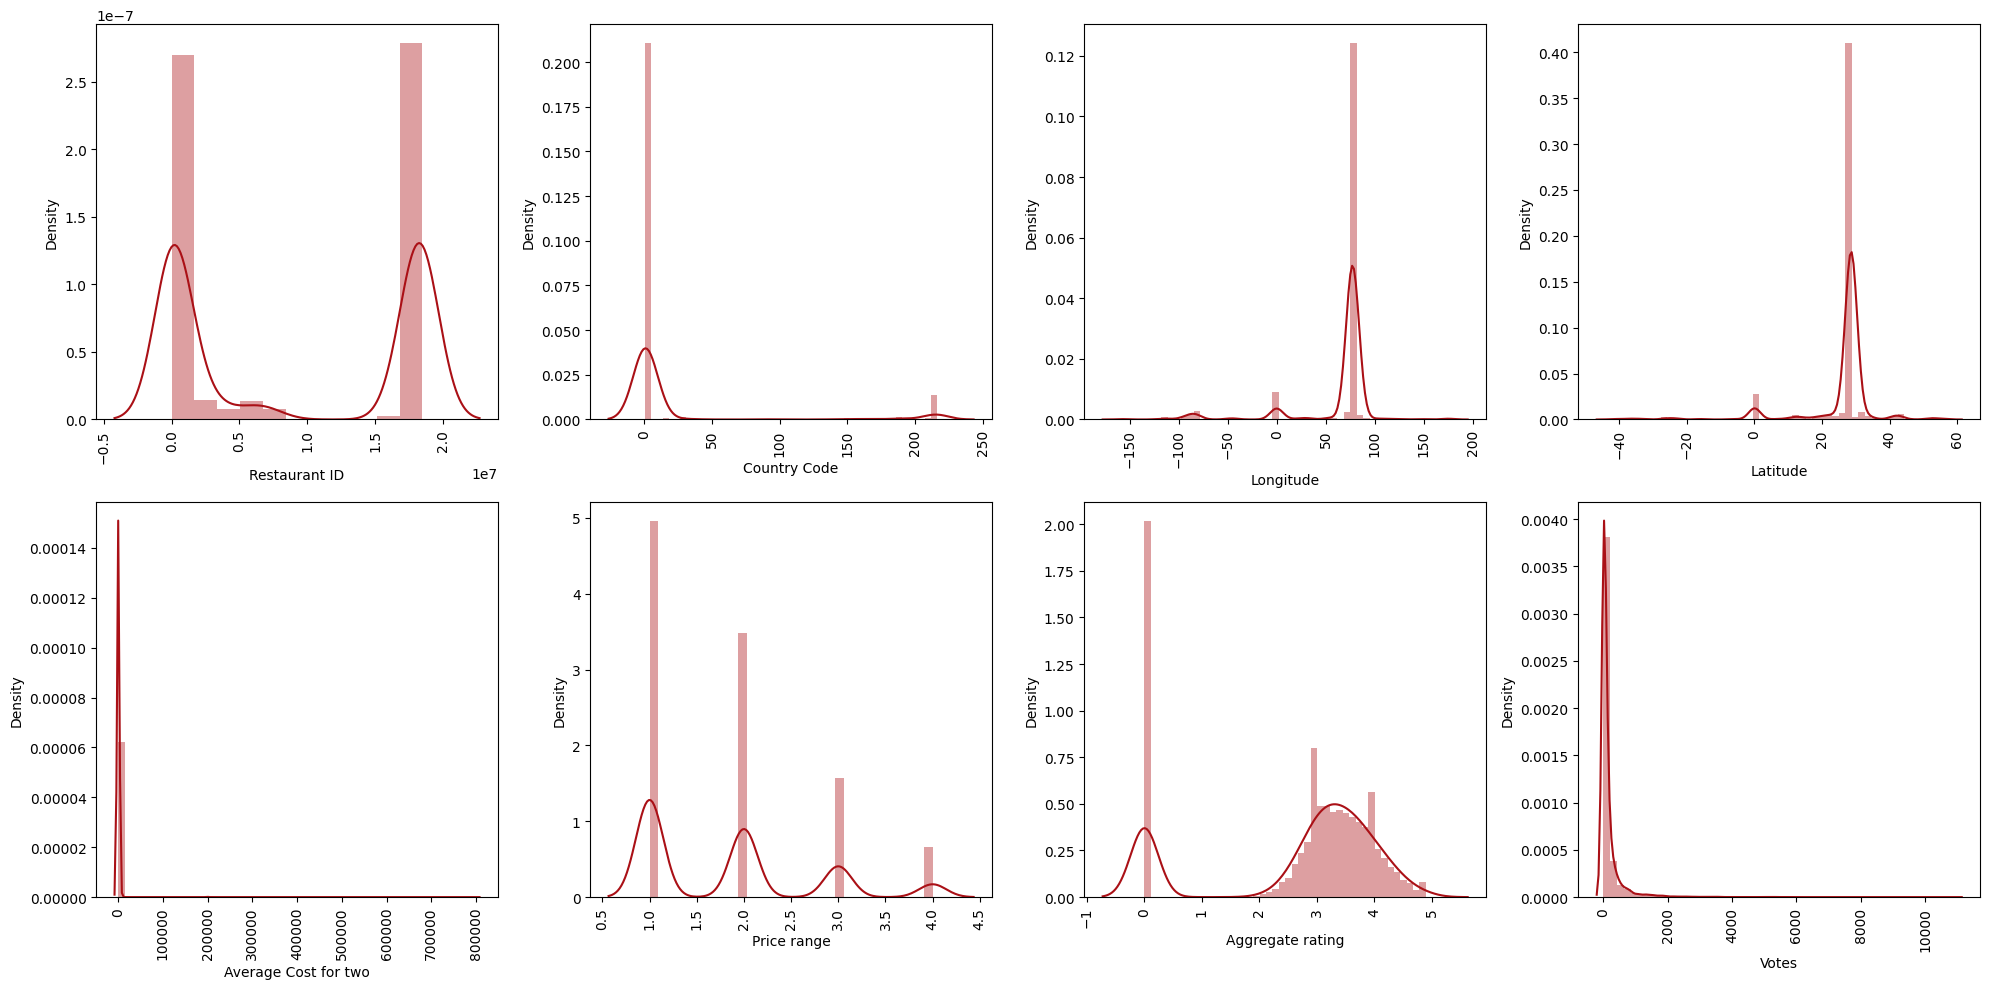

In [35]:
# Data distribution for numerical columns
plt.figure(figsize=(20, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 8:
        ax = plt.subplot(2, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

- Restaurant ID and Country Code are nominal variables, and they do not provide any quantitative value.
- Price range and Aggregate Rating have discrete values and should be treated as categorical variables.
- Longitude and Latitude are skewed to the right while Average Cost for two and Votes is skewed to the left.

In [36]:
# Columns for data visualisation
num_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Votes']
cat_cols1 = ['Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 
             'Rating color', 'Rating text', 'Country', 'Aggregate rating']
cat_cols2 = ['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines']


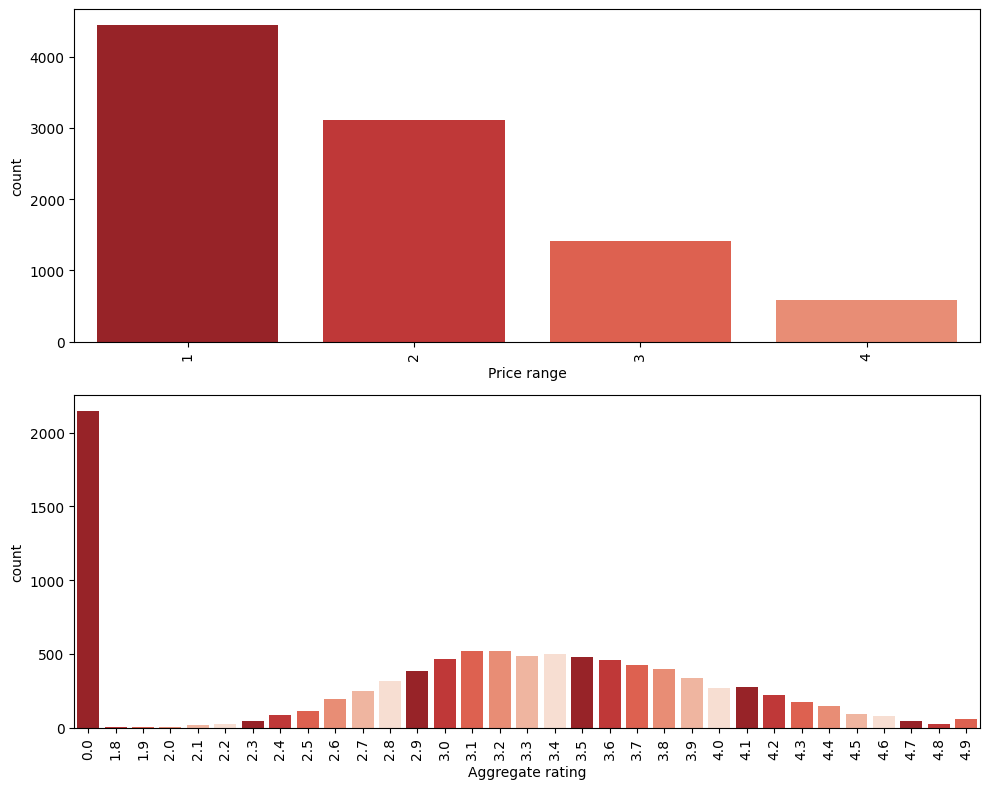

In [37]:
# Visualising Price range and Aggregate rating
plt.figure(figsize=(10, 8))
plot_num = 1
for col in ['Price range', 'Aggregate rating']:
    if plot_num <= 2:
        ax = plt.subplot(2, 1, plot_num)
        sns.countplot(x = df[col])
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Here we can observe that the maximum observed price range is 1. <br>
Also, most of the restaurants seem to have 0 or no rating.

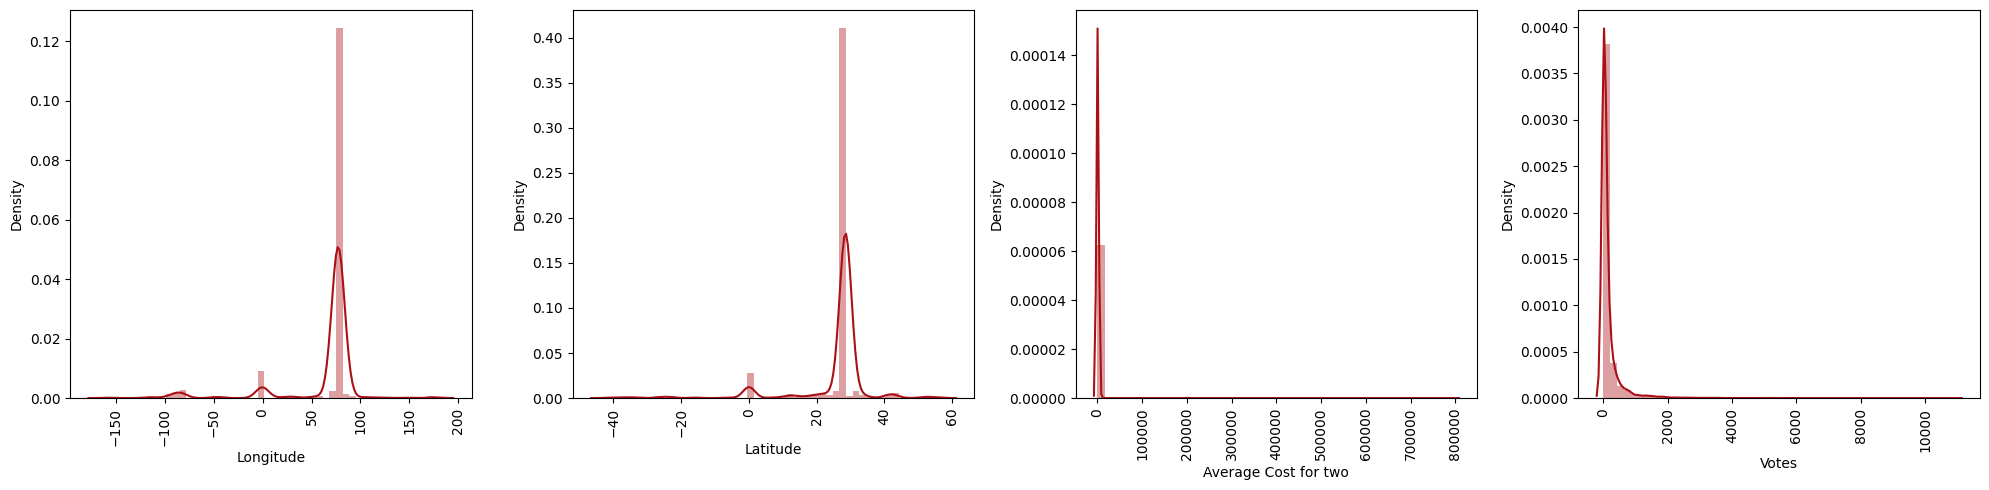

In [38]:
# Data distribution for numerical columns
plt.figure(figsize=(20, 5))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(1, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The above columns are numerical and continuous.

##### Bivariate analysis

###### Relationship of variables with Price range

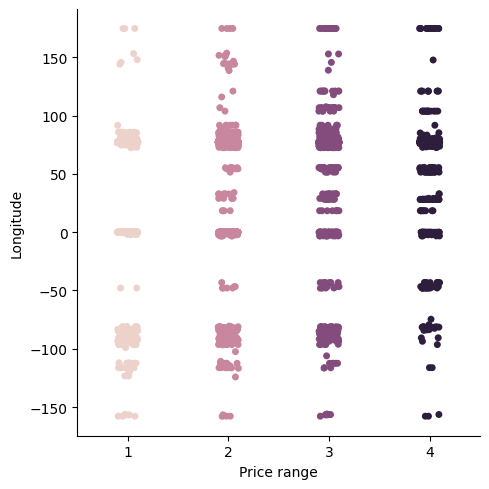

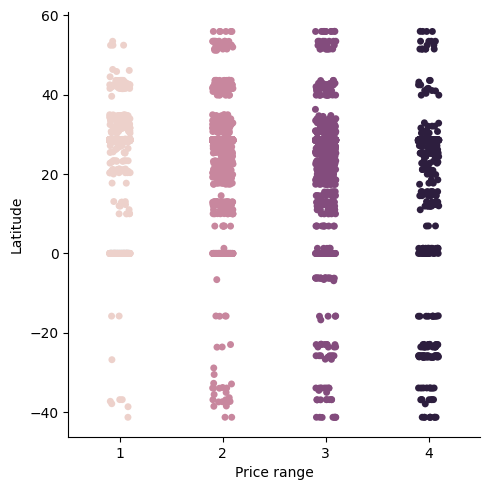

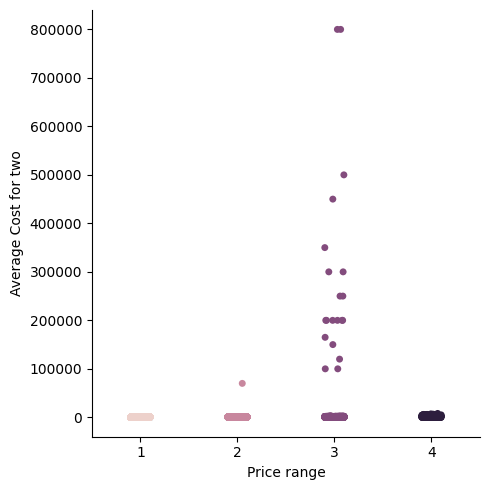

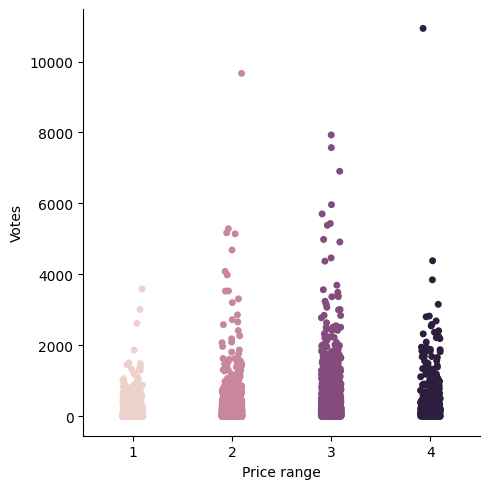

In [39]:
# Numerical columns vs Price range
for col in num_cols:
    sns.catplot(x='Price range', y=col, hue='Price range', data=df)
plt.show()

 - Price range does not seem to vary with Latitude and Longitude.
 - Average Cost for two seems to be higher for Price range 3.
 - The Votes seem to be incfreasing for higher price range values. Highest Votes are also generally observed for Price range 3.

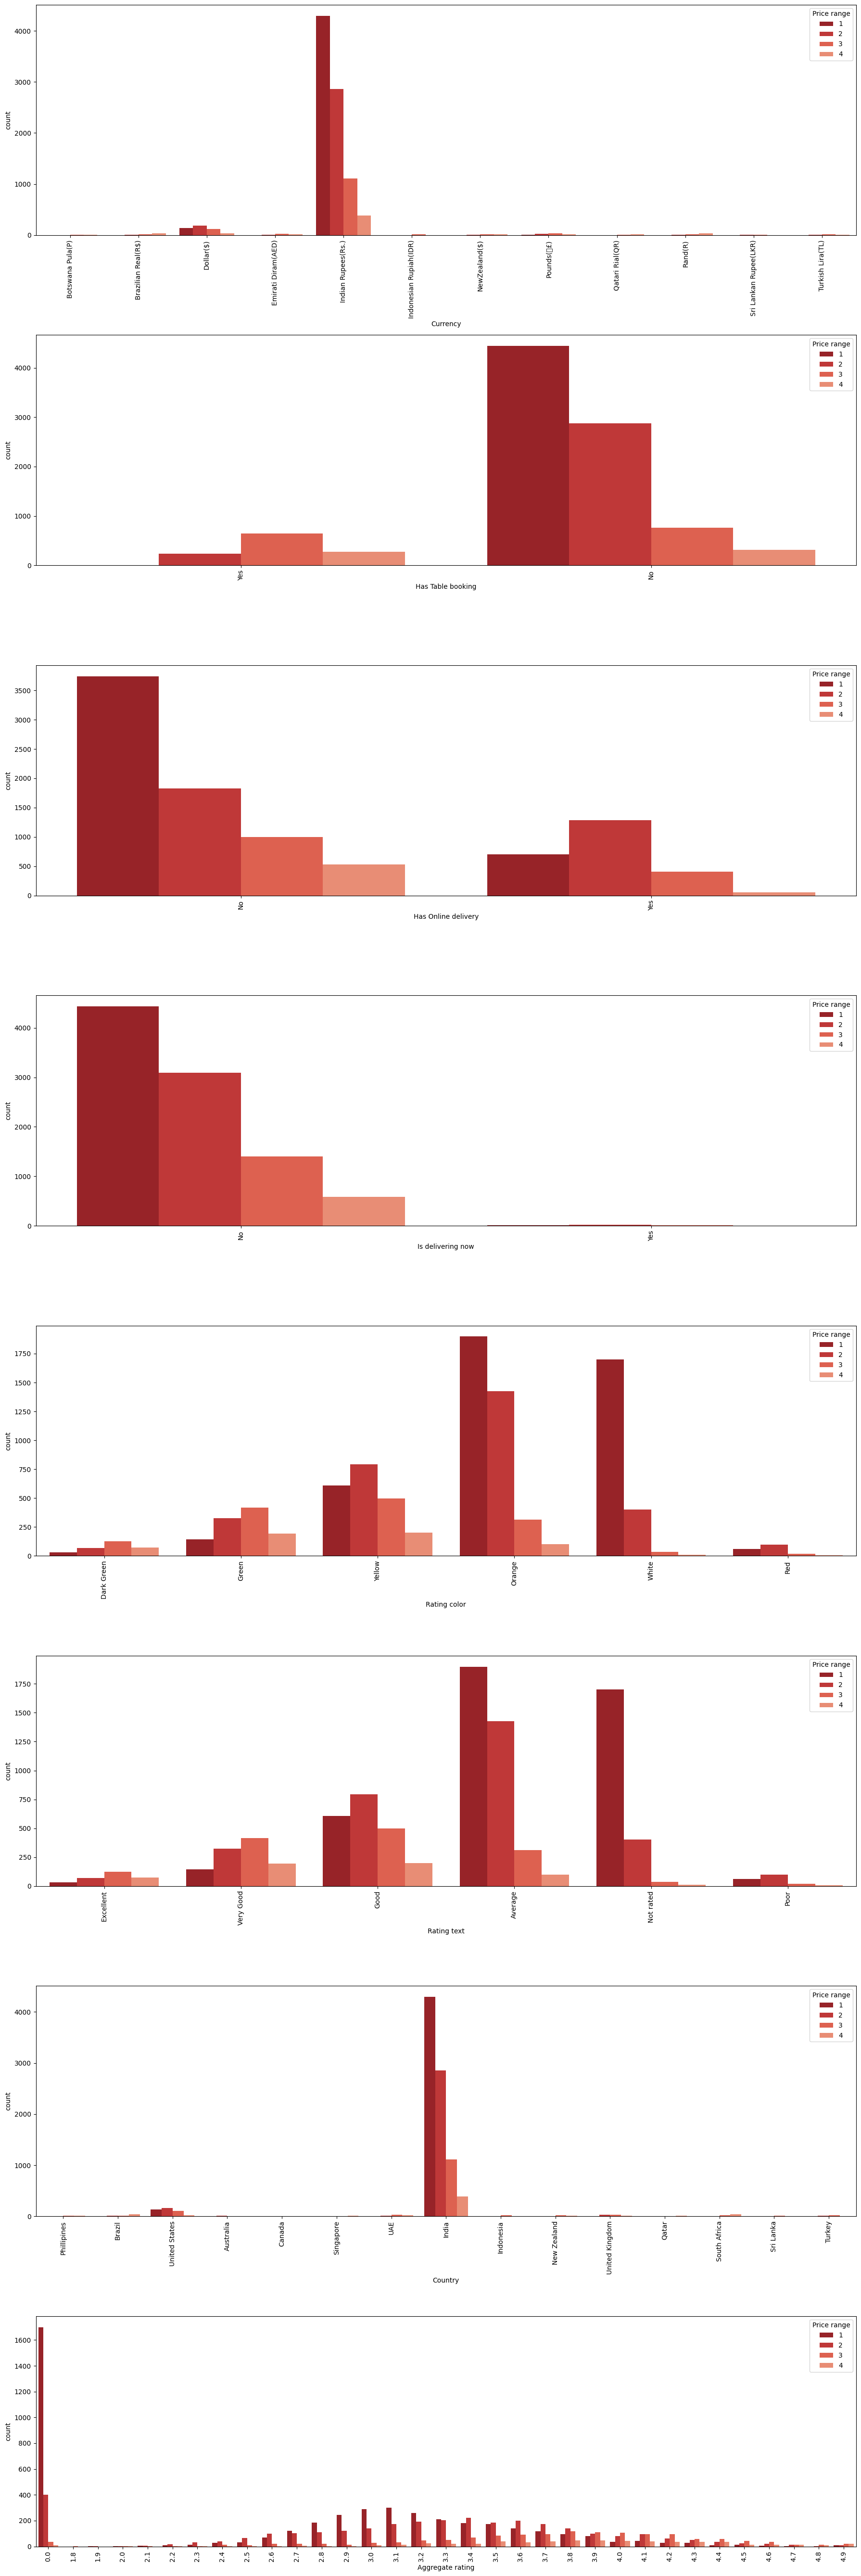

In [40]:
# Categorical columns vs Price range
plt.figure(figsize=(18, 60))
plot_num = 1
for col in cat_cols1:
    if plot_num <= 9:
        ax = plt.subplot(9, 1, plot_num)
        sns.countplot(x=col, hue='Price range', data=df)
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Observations:
- Price range 1 is most common for Indian currency, while Price range 2 is the most common for Dollars currency, and Price range 3 is most common for Pounds.
- If a restaurant has table booking, then its price range is higher. If they do not have table booking the price range is generally lower.
- If a restaurant does not have online booking, its price range is lower, compared to if it has online booking.
- Majority of the restaurants are not delivering. If they are delivering, the price range is generally 2.
- For Rating color Dark Green and Green, the Price range tends to be on the higher side, while for Orange and Red colors the Price range seems to be on the lower side.
- For Rating text Excellent and Very Good, the Price range seems to be on the higher side, while for Average and Poor ratings the Price range seems to be on the lower side.
- The Price range in India is mostly 1 or 2, and fewer 3 and 4. United States and United Kingdom seems to have majority restaurants with Price range 2 or 3.
- As the Aggregate rating increases, the Price range also seems to increase.

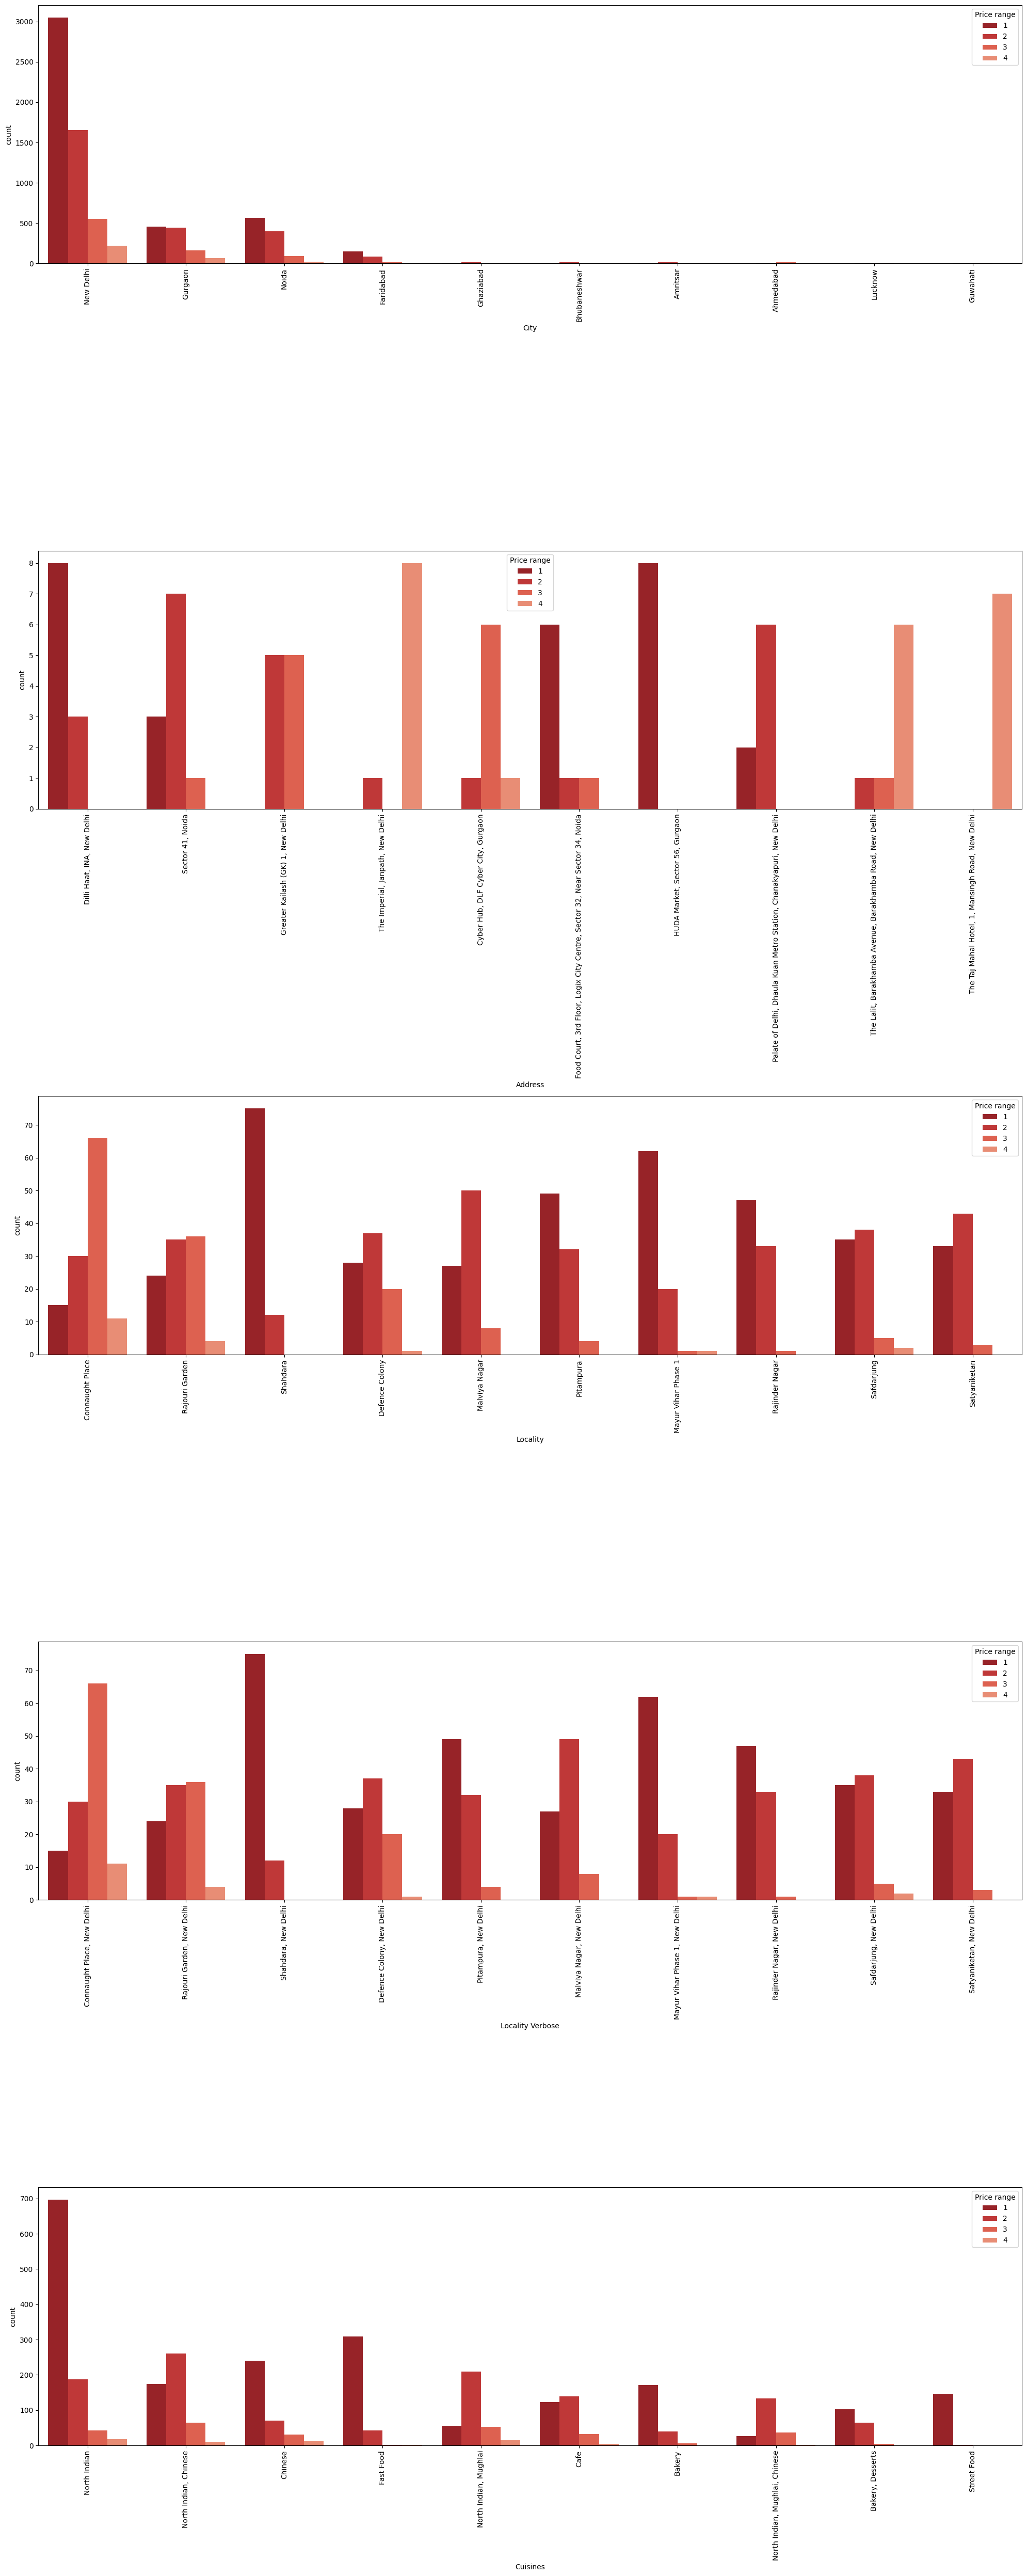

In [41]:
plt.figure(figsize=(20, 50))
plot_num = 1
for col in cat_cols2:
    if plot_num <= 5:
        ax = plt.subplot(5, 1, plot_num)
        sns.countplot(x=col, hue='Price range', data=df, order=df[col].value_counts().iloc[:10].index)
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

In the top 10 most frequently occurring values for the columns above, we observe the following:
- New Delhi, Gurgaon and Noida have restaurants with all price ranges, while others seem to have only lower price range restaurants.
- Connaught Place and Rajouri Garden have more restaurants with higher price range than the other places.
- North Indian, Chines, Mughlai etc. food seem to have some restaurants with higher price range.

###### Relationship of variables with Average Cost for two

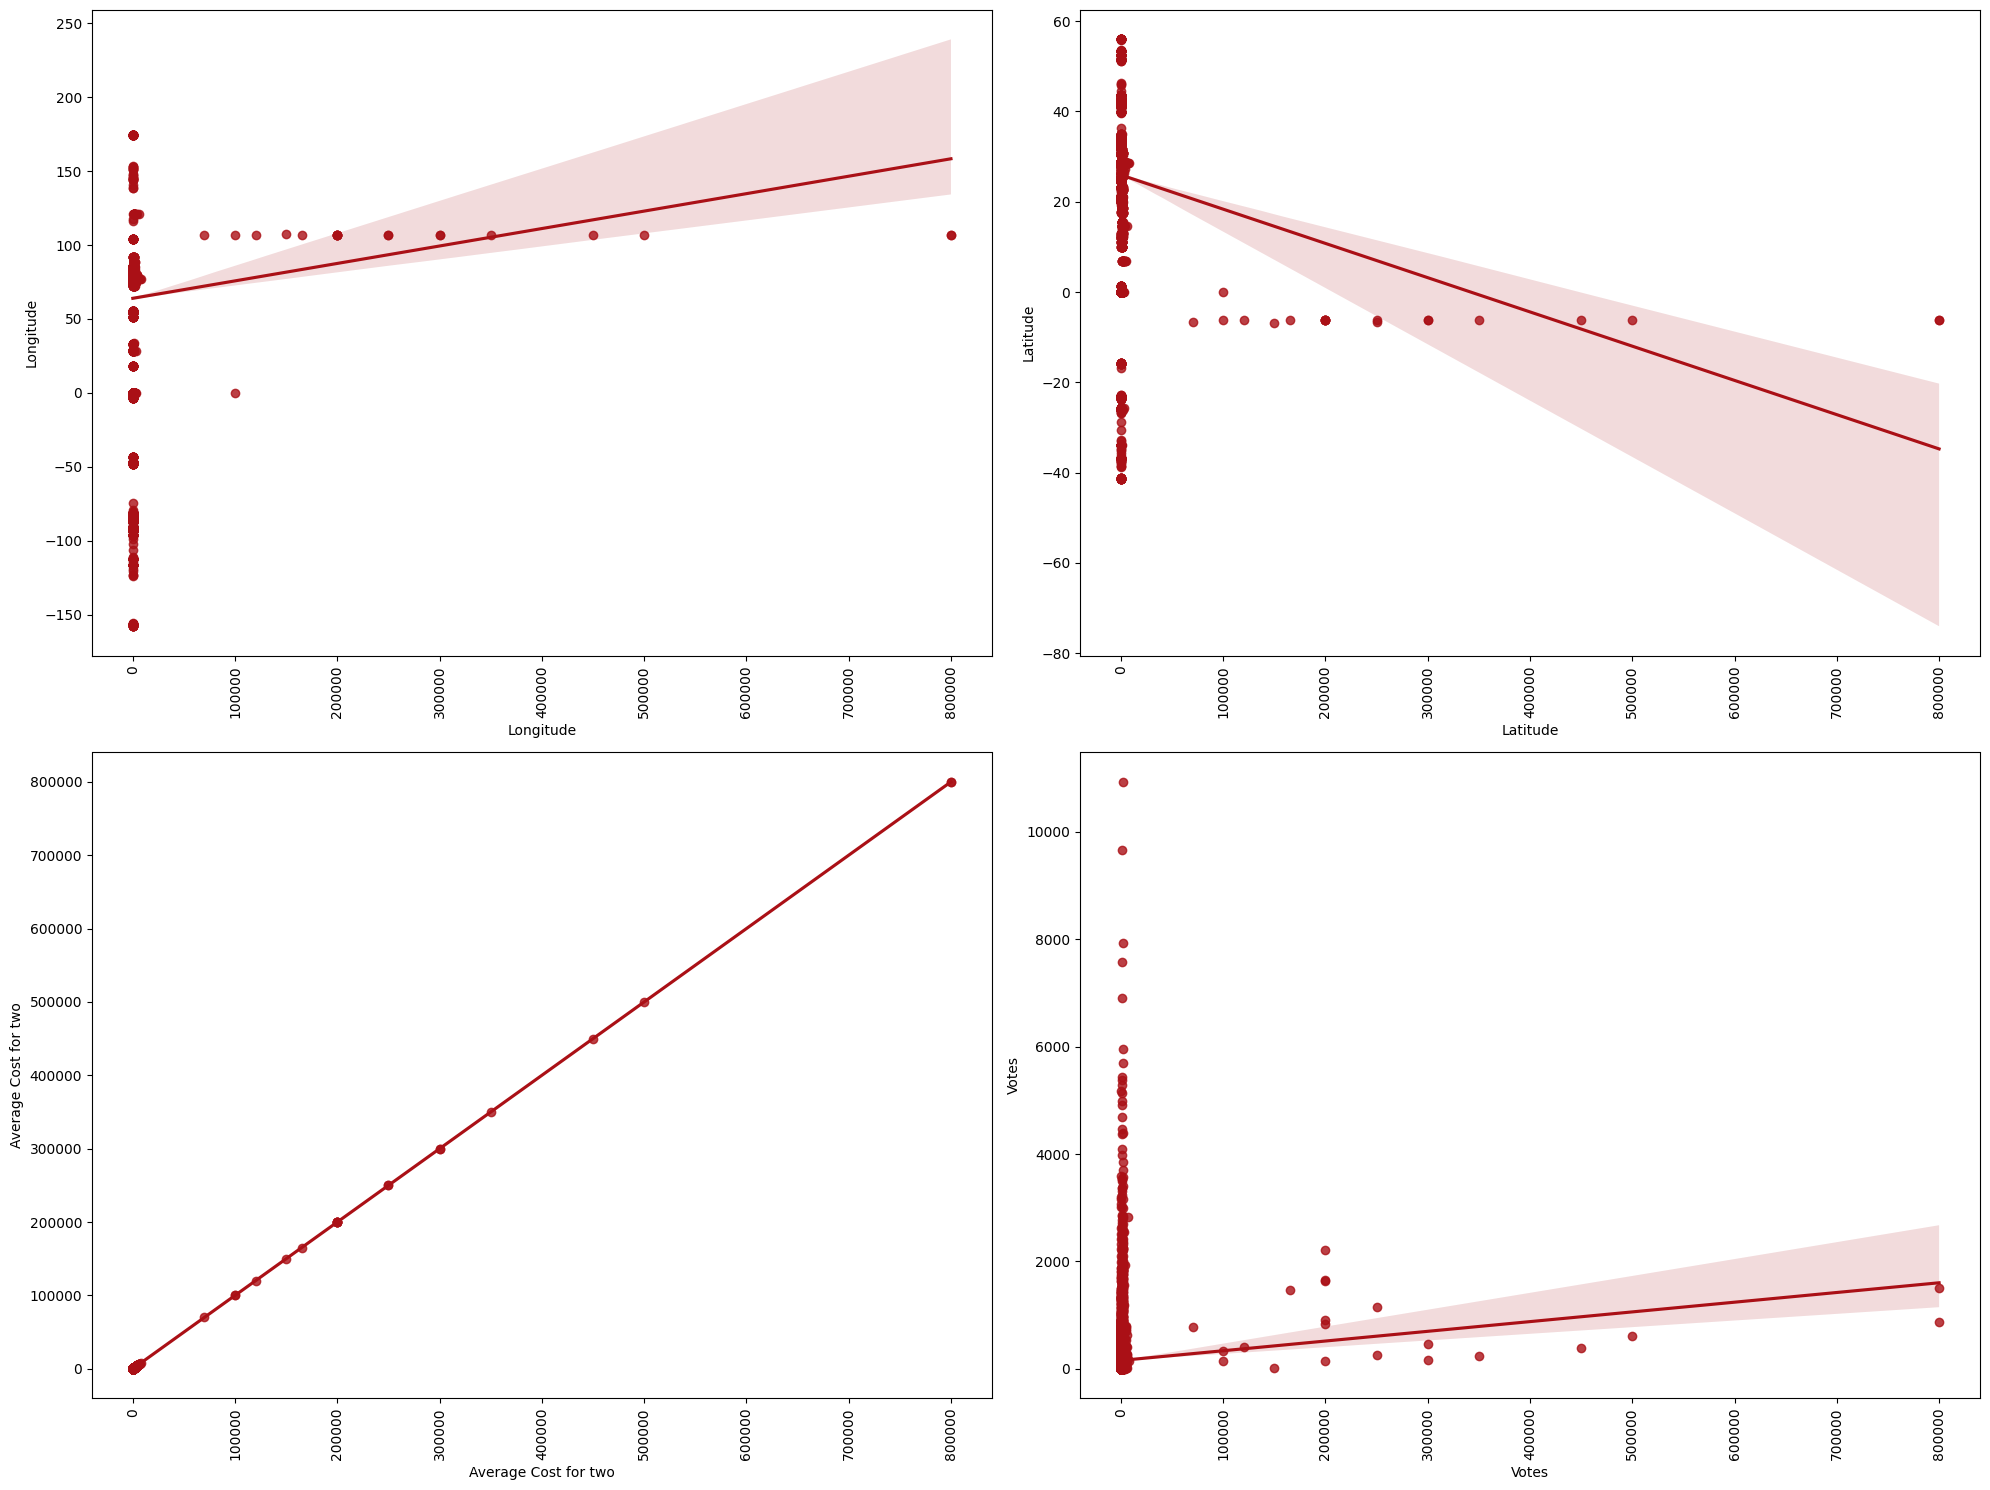

In [42]:
# Numerical columns vs Average Cost for two
plt.figure(figsize=(20, 15))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 2, plot_num)
        sns.regplot(x='Average Cost for two', y=col, data=df)
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

- Longitude and Votes has a positive relationship with Average Cost for two
- Latitude seems to have a negative relationship with Average Cost for two

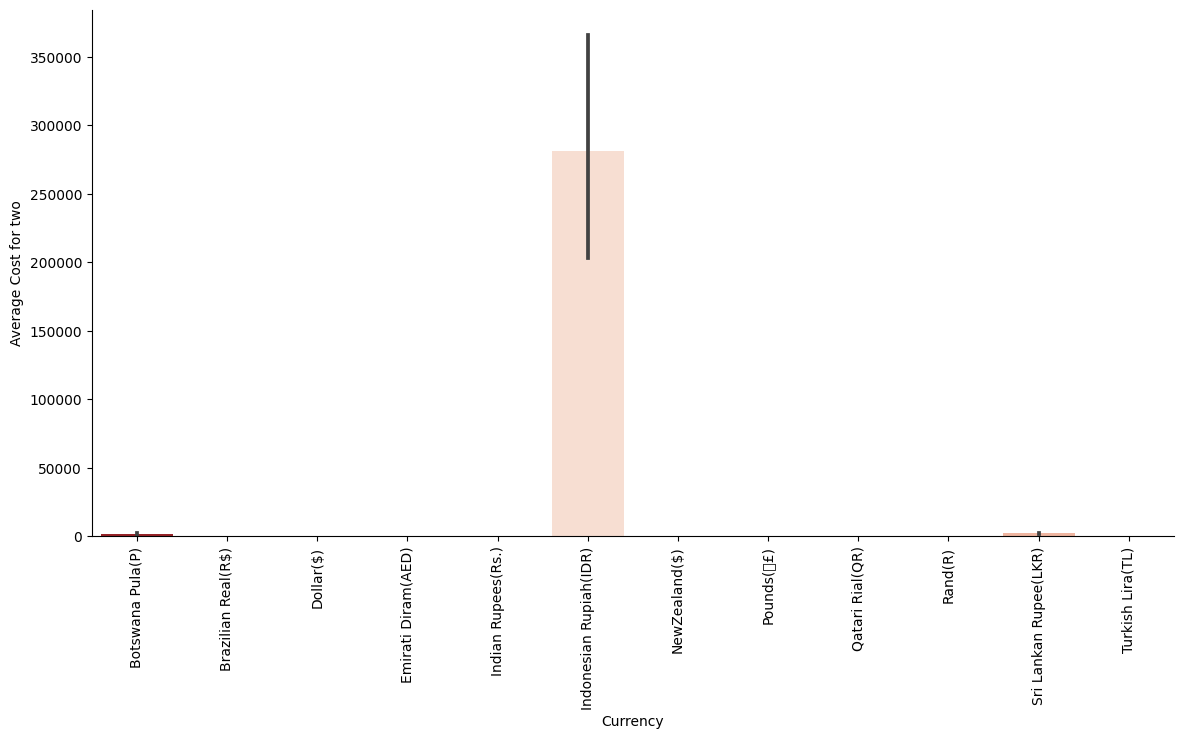

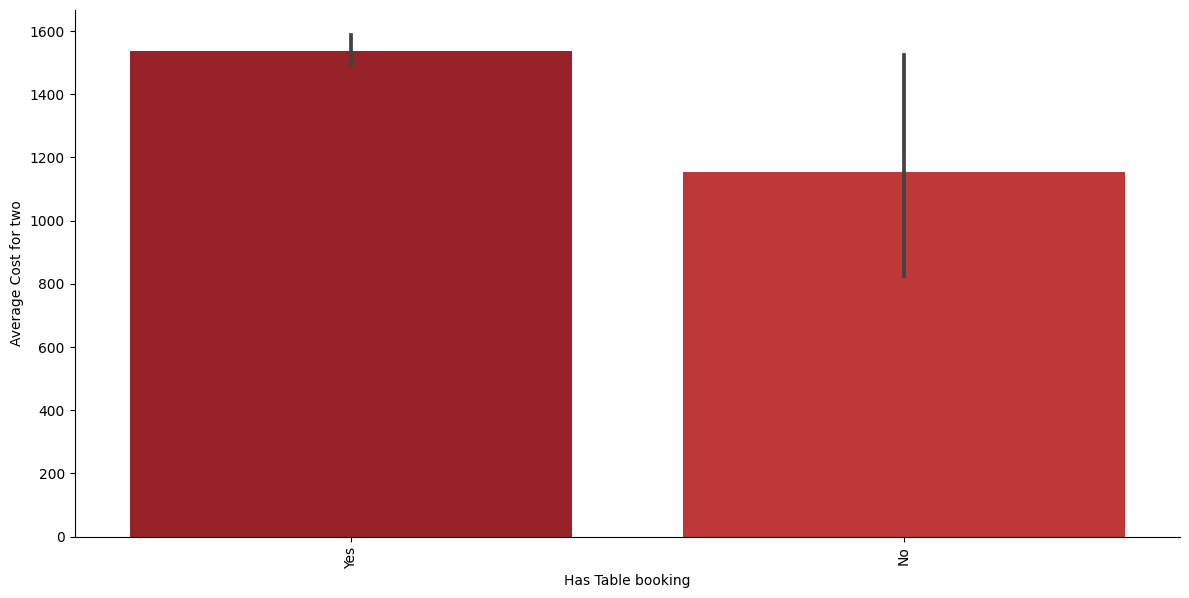

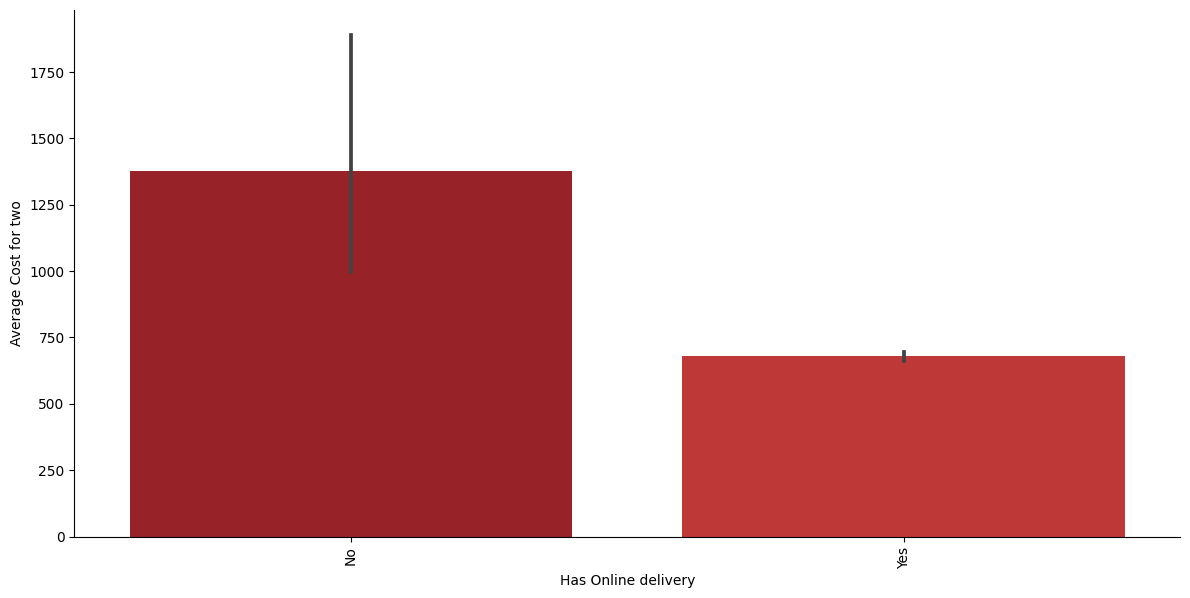

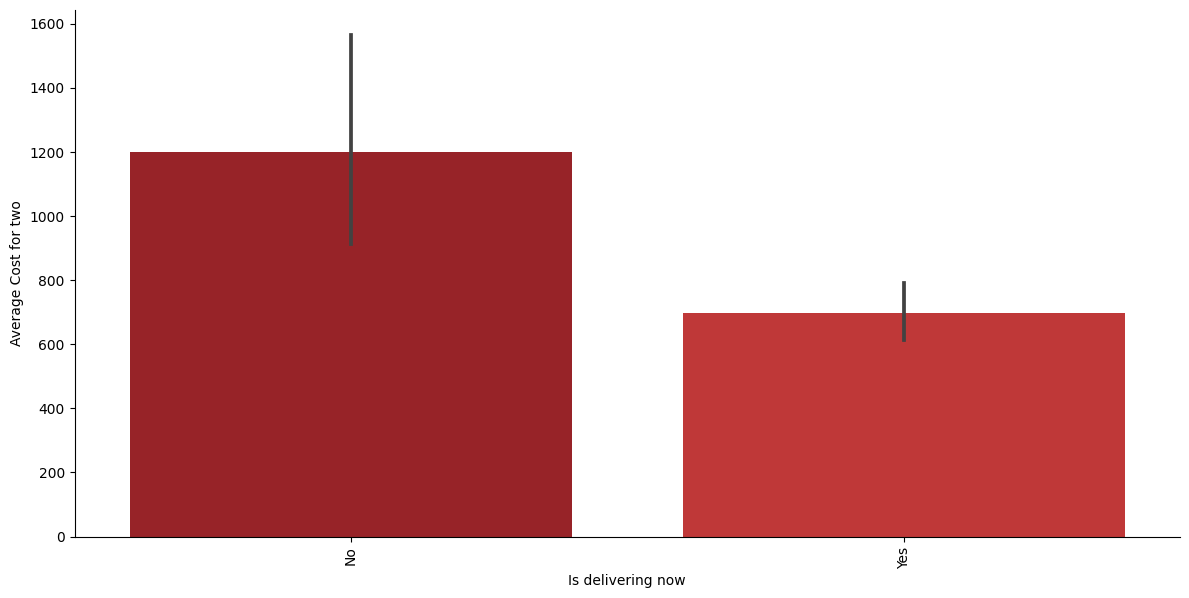

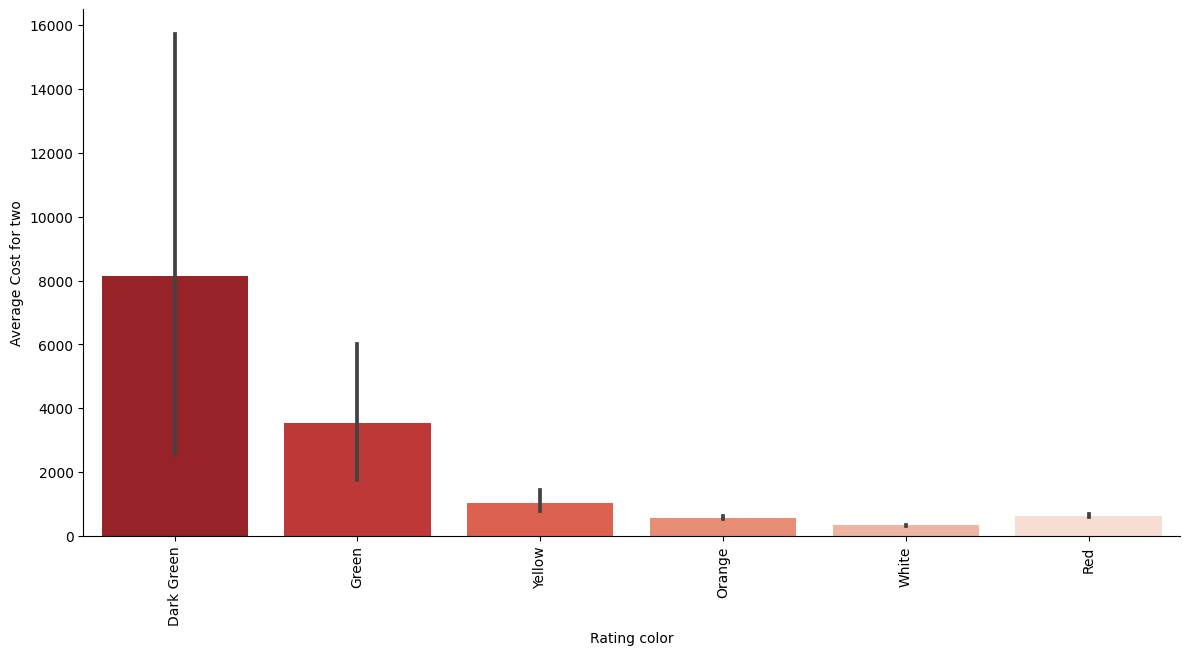

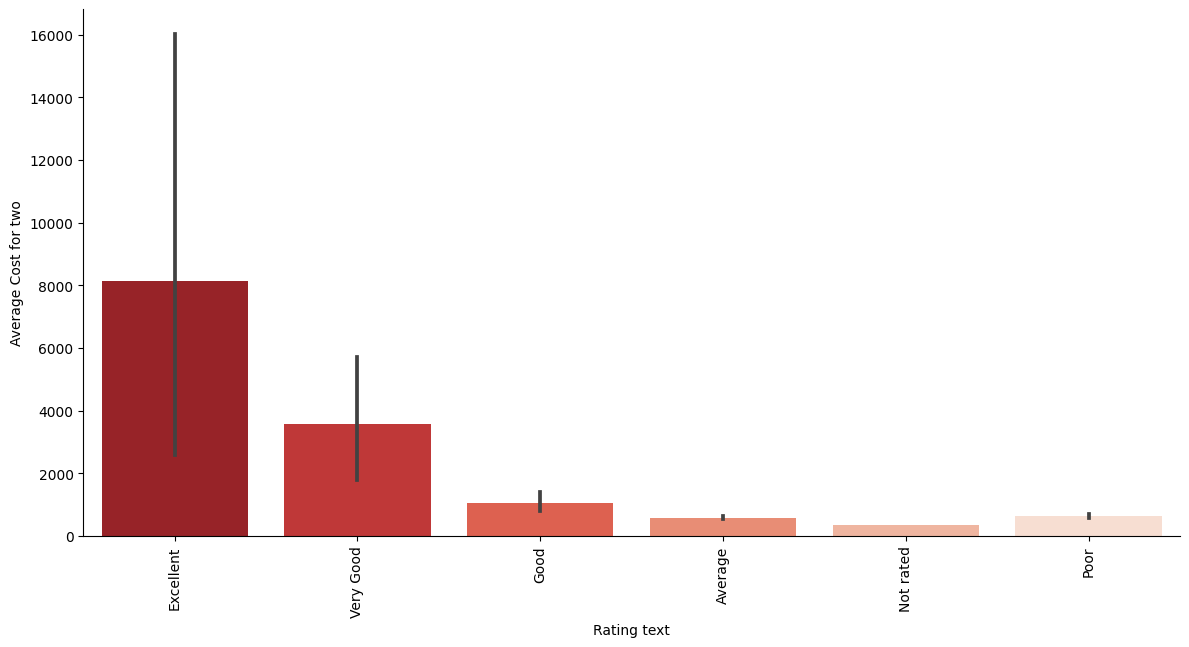

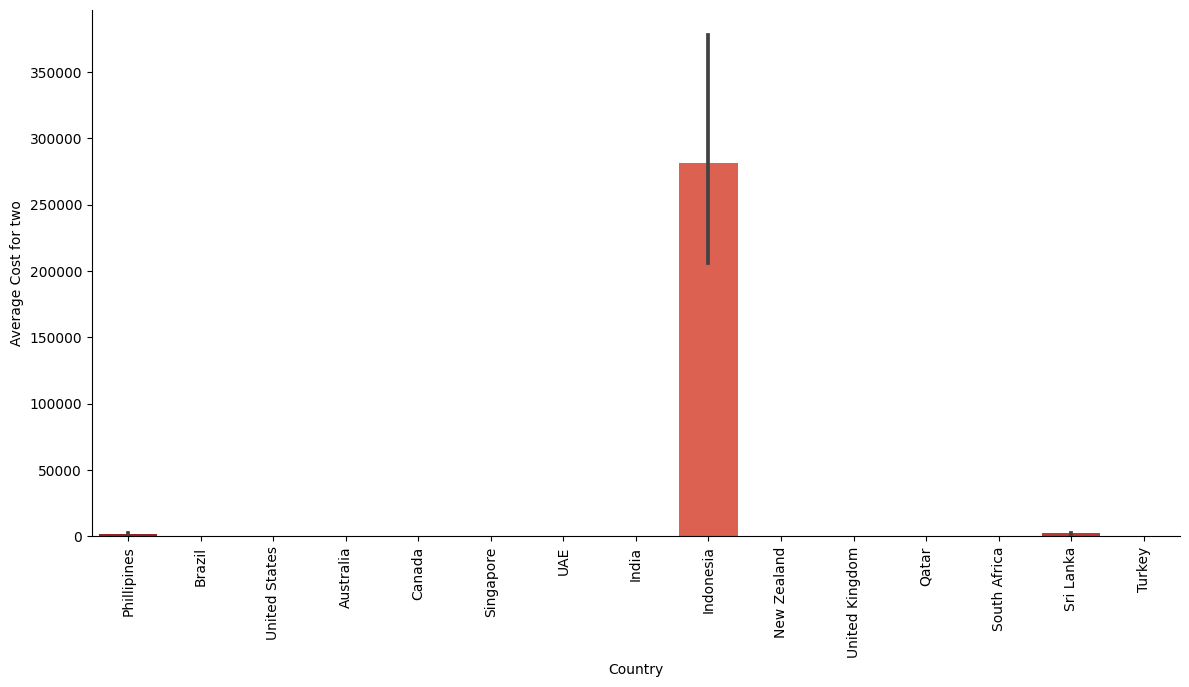

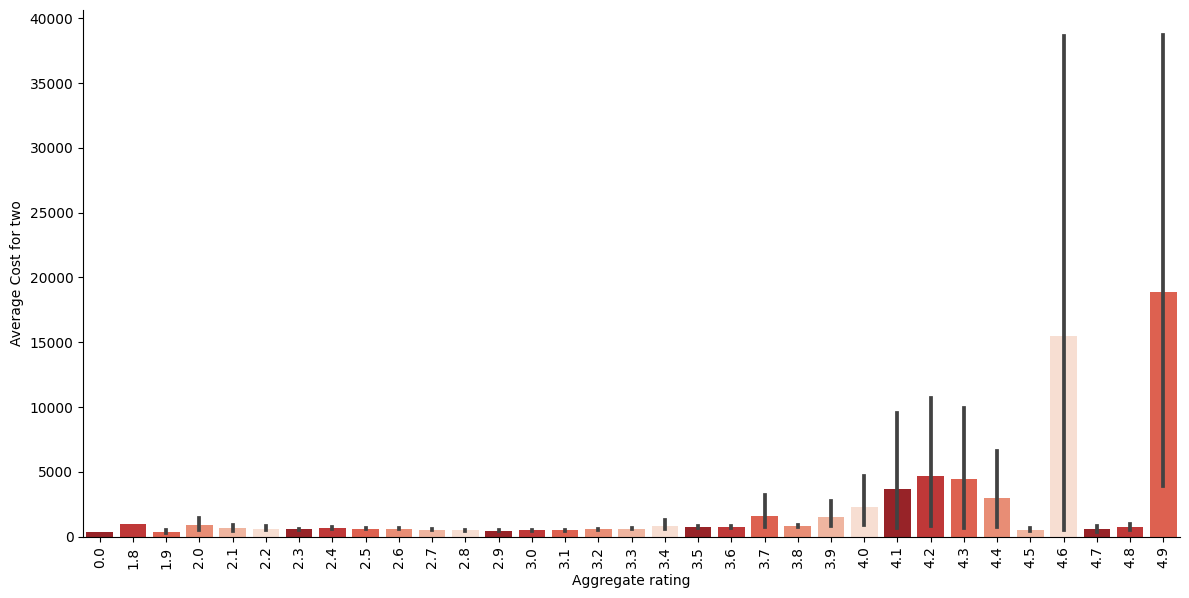

In [43]:
# Categorical columns vs Average Cost for two
for col in cat_cols1:
    sns.catplot(x=col, y='Average Cost for two', data=df, height=6, aspect=12/6, kind='bar')
    plt.xticks(rotation = 90, fontsize = 10)
plt.show()

- The average cost for two is generally higher in Indonesian currency.
- The average cost for two tends to be higher if the restaurant has table booking.
- The average cost for two tends to be higher if the restaurant has online delivery.
- Most of the restaurants are not delivering, so average cost for two is still higher for restaurants not delivering.
- The Average cost for two is higher if Rating color is Dark Green or Green.
- The Average cost for two is higher if Rating text is Excellent or Very Good.
- Average cost for two is higher in Indonesia.
- The average cost for two also generally increases with increase in Aggregate rating.

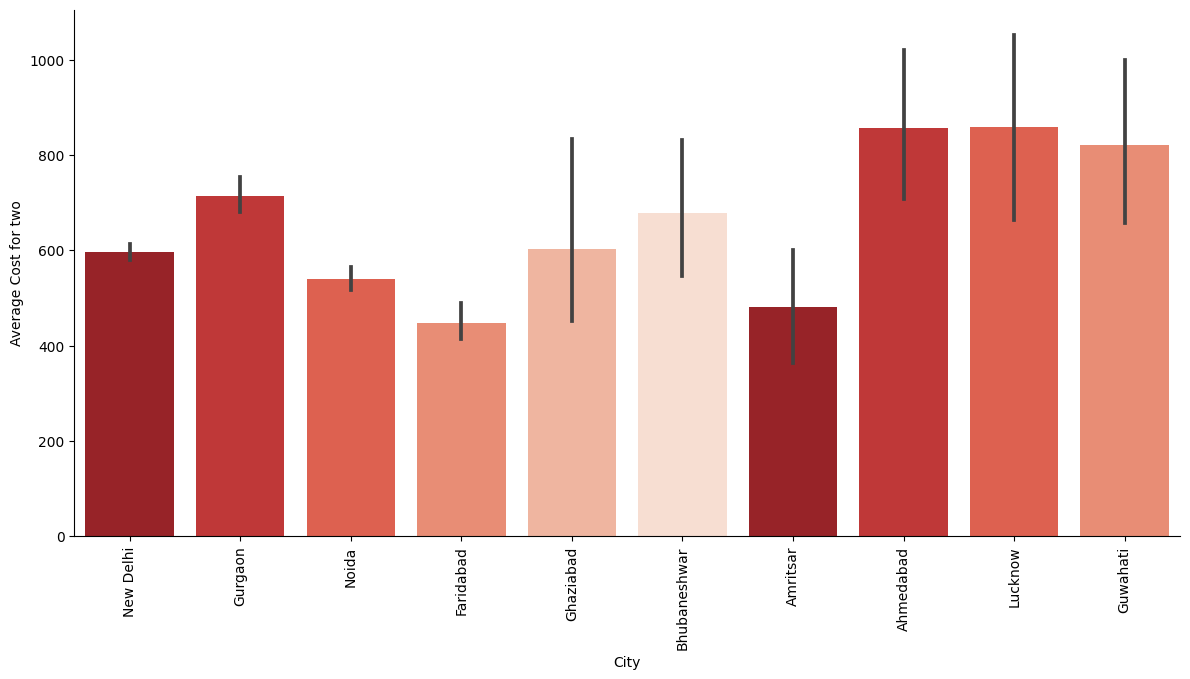

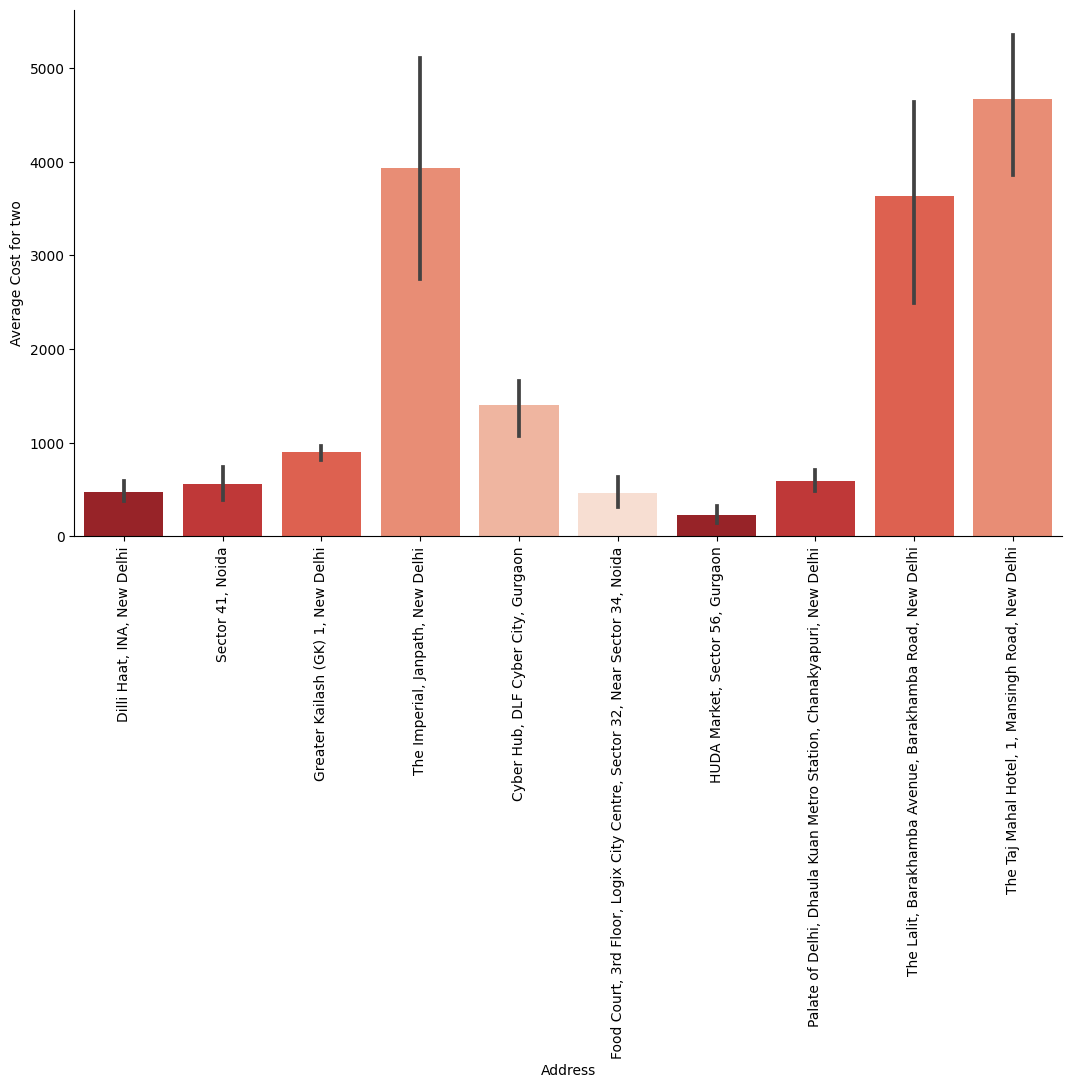

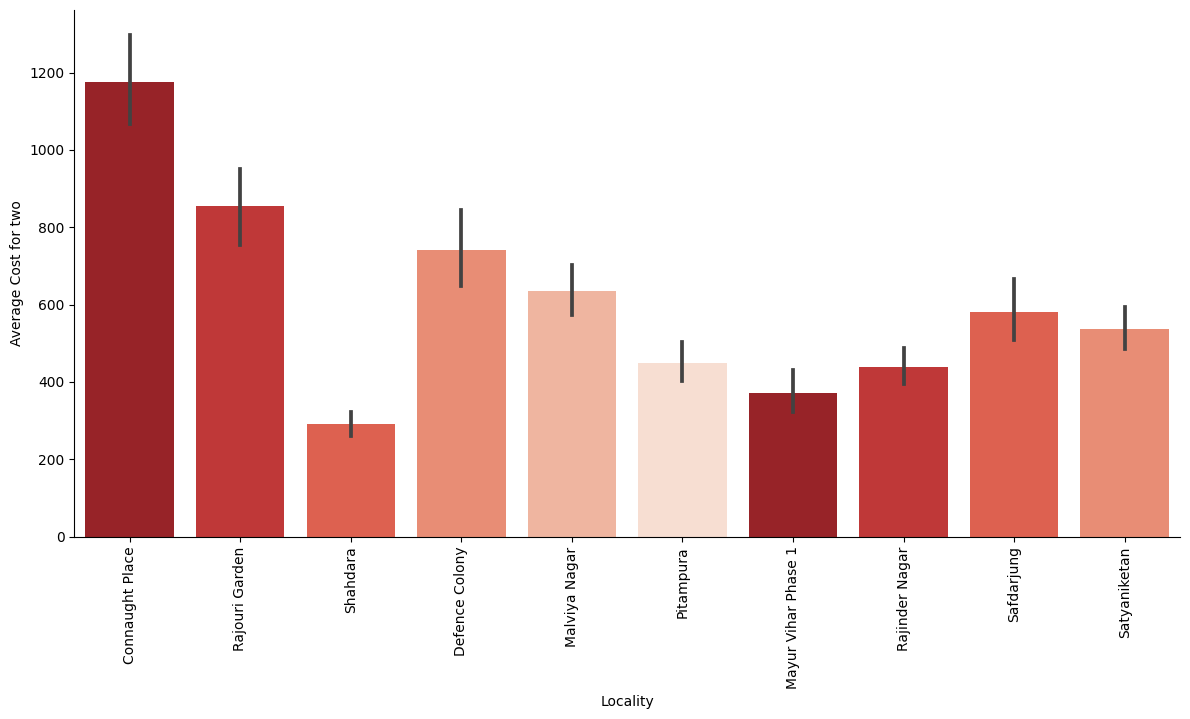

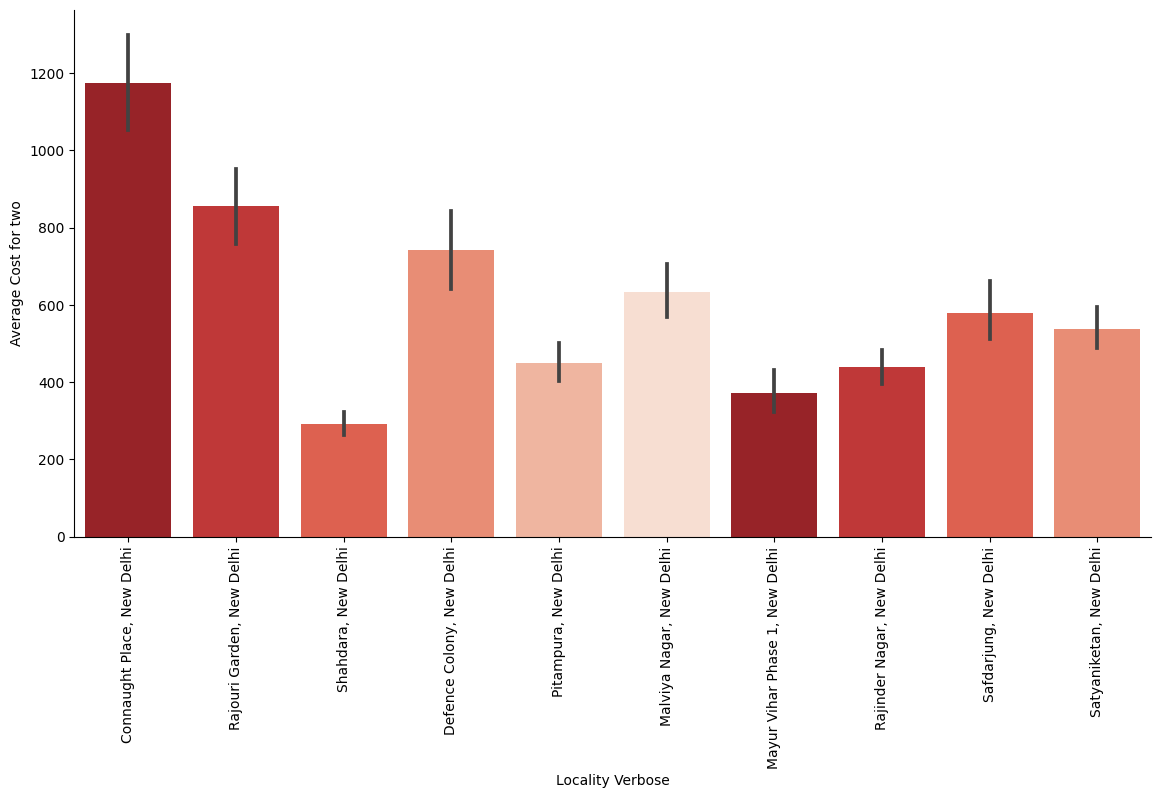

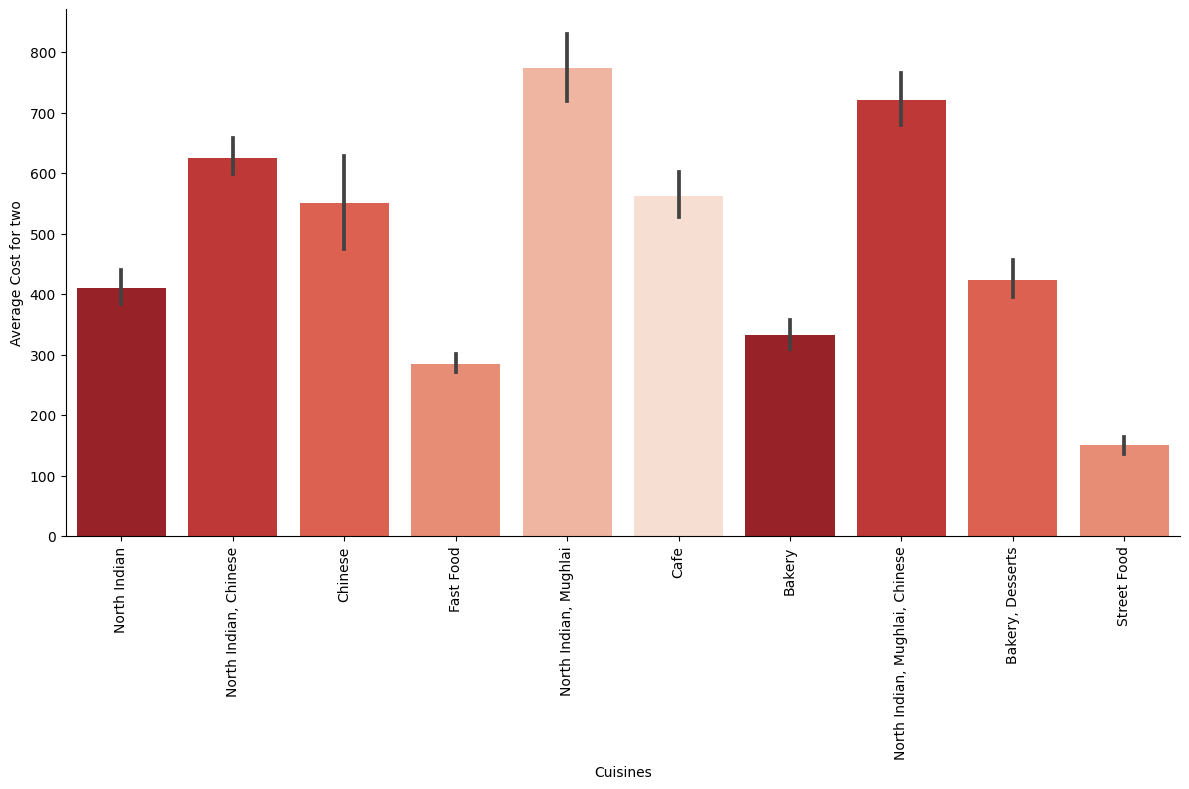

In [44]:
for col in cat_cols2:
    sns.catplot(x=col, y='Average Cost for two', data=df, height=6, aspect=12/6, kind='bar', order=df[col].value_counts().iloc[:10].index)
    plt.xlabel(col, fontsize = 10)
    plt.xticks(rotation = 90, fontsize = 10)
plt.show()

For the top 10 most frequently occuring values for the above columns, we observe the following:
- Average Cost for two seems to be higher in Ahmedabad and Lucknow.
- Average Cost for two also seems to be higher for "The Taj Mahal Hotel, 1 Mansingh Road, New Delhi"
- Average Cost for two is also higher in Connaught Place, New Delhi
- Average cost for two is generally higher for NorthIndian, Mughlai Cuisine.

##### Pairplot

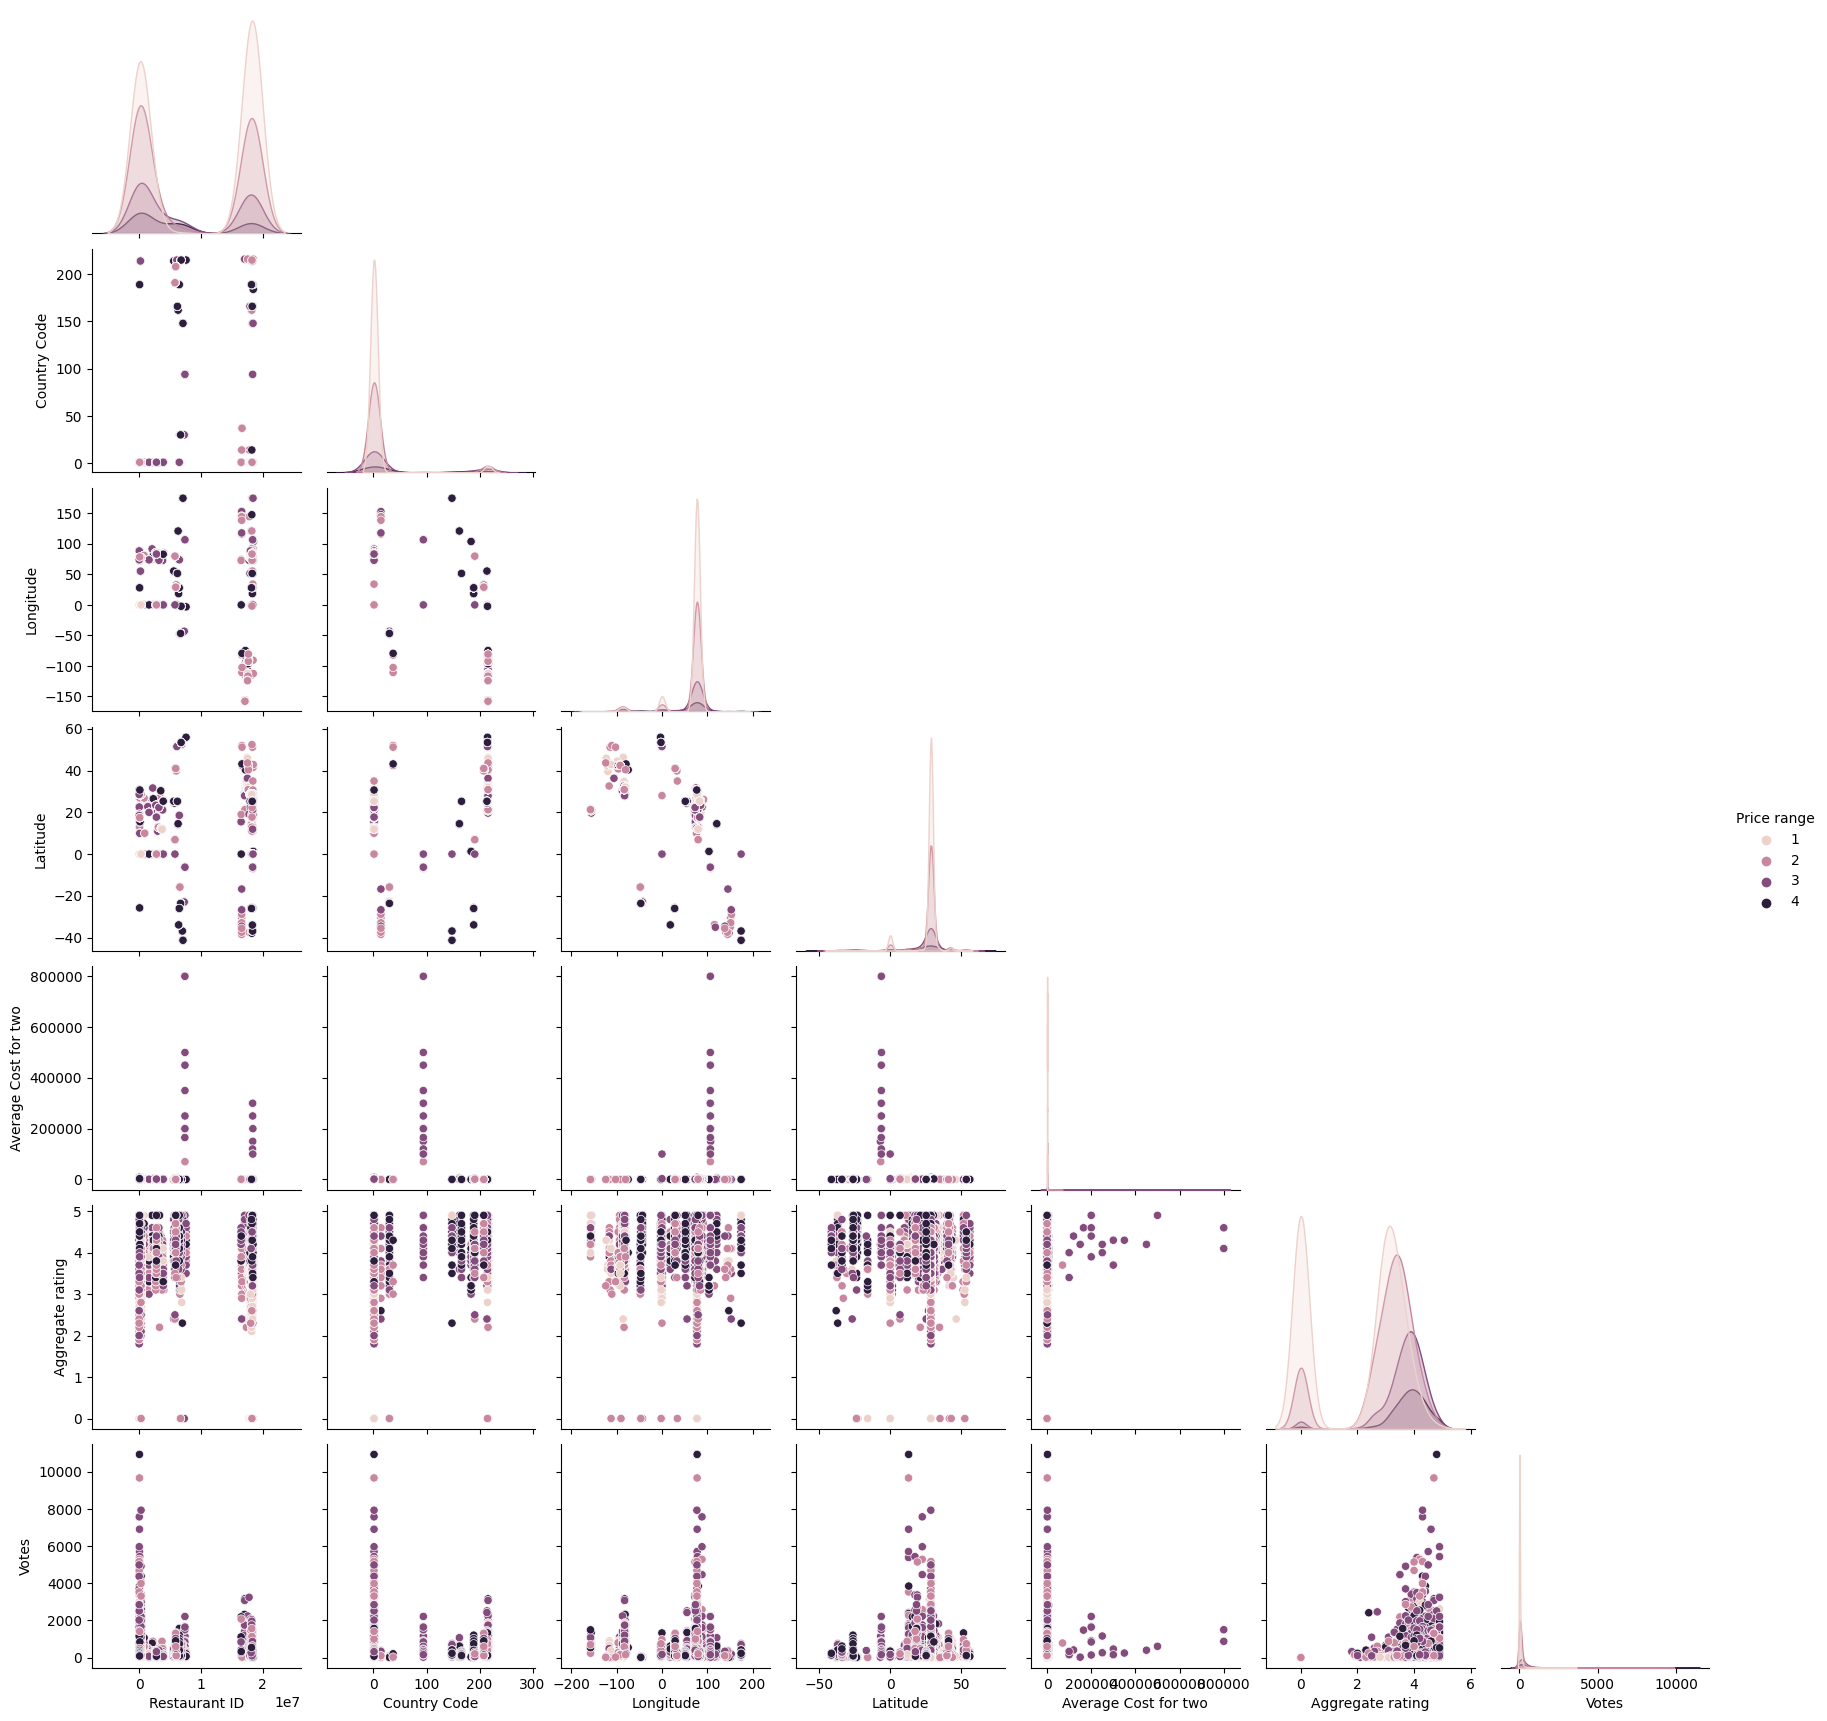

In [45]:
# Pairwise relation between variables with respect to the Price range
sns.pairplot(df, hue='Price range', corner=True)
plt.show()

Observations from the pairplot are:
- Aggregate rating seems to have a positive relationship with Votes and Average Cost for two.
- Average Cost for two also seems to be positively correlated to Votes.

In [46]:
# Dropping nominal columns
df.drop(columns=['Restaurant ID', 'Country Code'], inplace=True)
df

City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                ...                                                ...   
9546         ÛÁstanbul  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547         ÛÁstanbul  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548         ÛÁstanbul  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549         ÛÁstanbul  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550         ÛÁstanbul  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776                              Cafe                    55   

              Currency Has Table booking Has Online delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9546  Turkish Lira(TL)                No                  No   
9547  Turkish Lira(TL)                No                  No   
9548  Turkish Lira(TL)                No                  No   
9549  Turkish Lira(TL)                No                  No   
9550  Turk

In [47]:
# Dropping Rating color (as Rating text also conveys the same values)
df.drop(columns=['Rating color'], inplace=True)
df

City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                ...                                                ...   
9546         ÛÁstanbul  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547         ÛÁstanbul  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548         ÛÁstanbul  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549         ÛÁstanbul  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550         ÛÁstanbul  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776                              Cafe                    55   

              Currency Has Table booking Has Online delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9546  Turkish Lira(TL)                No                  No   
9547  Turkish Lira(TL)                No                  No   
9548  Turkish Lira(TL)                No                  No   
9549  Turkish Lira(TL)                No                  No   
9550  Turk

### Checking for outliers

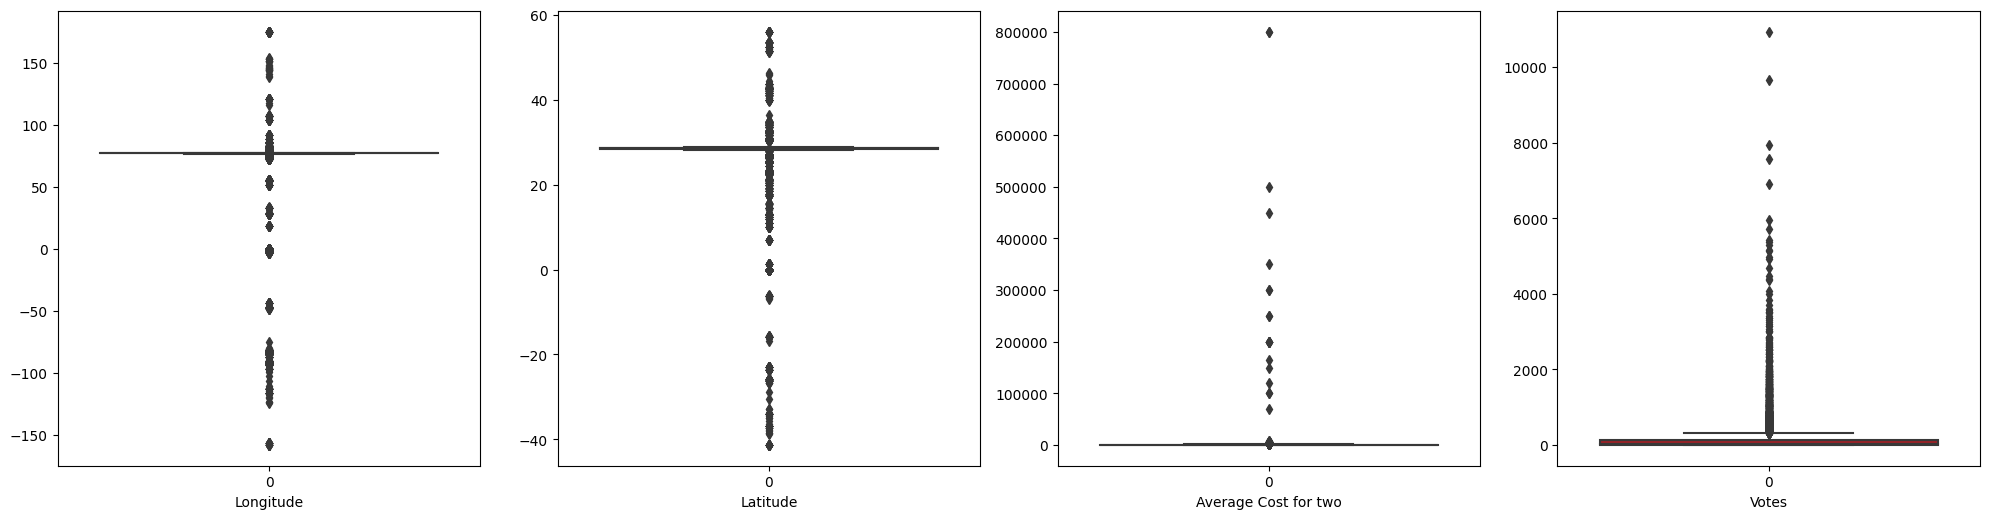

In [48]:
# Checking for outliers using boxplot
plt.figure(figsize=(20, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 4, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There  seem to be outliers in all the columns. We need to remove these outliers using a suitable method.

#### Z-score method

In [49]:
from scipy.stats import zscore

In [50]:
out_features = df[num_cols]
z = np.abs(zscore(out_features))
z

Longitude  Latitude  Average Cost for two     Votes
0      1.372269  1.025581              0.006154  0.365202
1      1.371945  1.026647              0.000049  1.009168
2      1.372975  1.024131              0.173743  0.262911
3      1.372966  1.023775              0.018659  0.483766
4      1.372991  1.023854              0.018659  0.167595
...         ...       ...                   ...       ...
9546   0.847685  1.378025              0.069428  1.467151
9547   0.846144  1.376849              0.067878  2.039049
9548   0.846305  1.381025              0.063845  1.171903
9549   0.846272  1.381221              0.066947  1.729853
9550   0.846513  1.374571              0.070979  1.009168

[9551 rows x 4 columns]

In [51]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(8756, 17)

In [52]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

8.323735734478065

Data loss percentage is around 8.32% for Z-score method.

#### IQR method

In [53]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(6542, 17)

In [54]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

31.504554496911318

Data loss percentage is around 31.5%. Normally, we consider data loss of less than 10% only.<br>

In this case, we have to use the Z-score method.

In [55]:
df = df_z

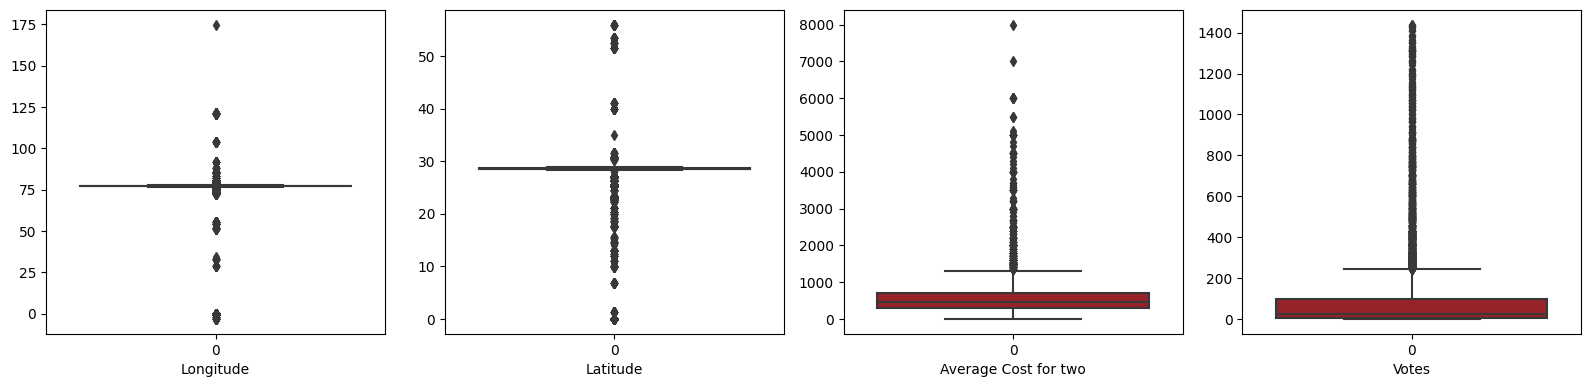

In [56]:
# Checking for outliers again using boxplot
plt.figure(figsize=(20, 15))
plot_num = 1
for col in num_cols:
    if plot_num <= 17:
        ax = plt.subplot(4, 5, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Some of the outliers have now been removed.

### Checking for skewness

In [57]:
df.skew()

Longitude              -3.179687
Latitude               -2.246169
Average Cost for two    3.667387
Price range             0.987956
Aggregate rating       -0.887535
Votes                   3.555810
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions) and between -1 to 1 for moderately normal distributions.<br>
This means that none of the columns are within the range. Price range is discrete, so we will not transform it.

In [58]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [59]:
# Removing skewness
columns = ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [60]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

Longitude  Latitude  Average Cost for two  \
Log Transformation                NaN       NaN                   NaN   
Box-Cox Transformation            NaN -3.479525              0.265088   
Inverse Transformation            NaN       NaN                   NaN   
Yeo Johnson Transformation  -0.963583  0.409513              0.053722   
Cube Root Transformation    -3.521810 -3.541278              0.931386   
Square Root Transformation        NaN -3.302367              1.545833   

                            Aggregate rating     Votes  
Log Transformation                       NaN       NaN  
Box-Cox Transformation             -1.080242  0.400803  
Inverse Transformation                   NaN       NaN  
Yeo Johnson Transformation         -0.619960 -0.012358  
Cube Root Transformation           -1.152769  0.743492  
Square Root Transformation         -1.108201  1.566641

The Yeo Johnson transformation is the most suitable transformation for  this data.

In [61]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [62]:
df.head()

City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose     Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  22790.560649  65.548565   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  22784.895234  65.462552   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  22802.918144  65.665629   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  22802.767955  65.694349   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  22803.203757  65.687979   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts             10.232487  Botswana Pula(P)   
1                          Japanese             10.411113  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian             13.053851  Botswana Pula(P)   
3                   Japanese, Sushi             10.876581  Botswana Pula(P)   
4                  Japanese, Korean             10.876581  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating text     Votes      Country  
0         11.047522   Excellent  6.095866  Phillipines  
1         10.044624   Excellent  6.808049  Phillipines  
2          9.718611   Very Good  5.927358  Phillipines  
3         11.390032   Excellent  6.264439  Phillipines  
4         11.047522   Excellent  5.744210  Phillipines

These are the transformed values. We can check the skewness again now.

In [63]:
df.skew()

Longitude              -0.963749
Latitude                0.409584
Average Cost for two    0.053731
Price range             0.987956
Aggregate rating       -0.620066
Votes                  -0.012360
dtype: float64

The skewness values are all within range now.

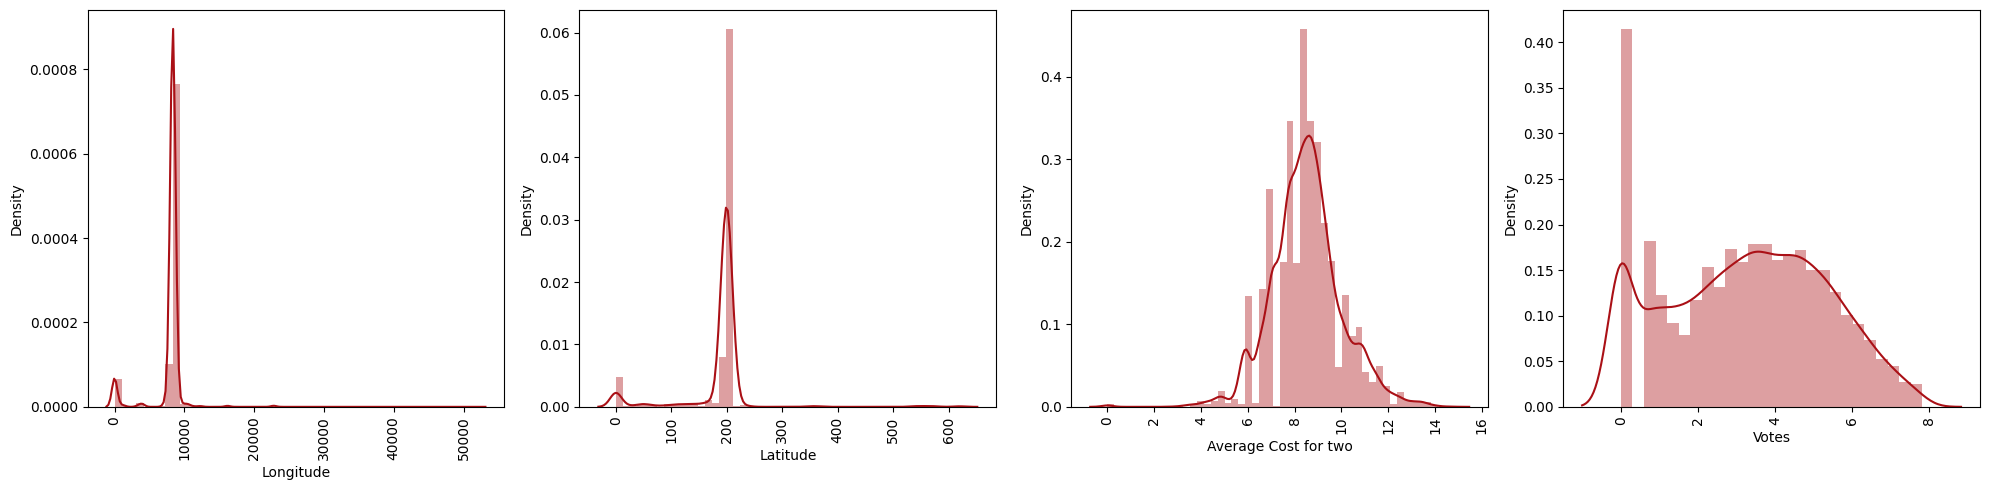

In [64]:
# Data distribution for numerical columns
plt.figure(figsize=(20, 5))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(1, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.xticks(rotation = 90, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distribution looks more normal now.

### Encoding categorical variables

In [65]:
# Using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [66]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

In [67]:
df.head()

City  Address  Locality  Locality Verbose     Longitude   Latitude  \
0  34.0   7911.0     130.0             131.0  22790.560649  65.548565   
1  34.0   5385.0     451.0             459.0  22784.895234  65.462552   
2  36.0   4065.0     235.0             241.0  22802.918144  65.665629   
3  36.0   7916.0     649.0             662.0  22802.767955  65.694349   
4  36.0   7915.0     649.0             662.0  22803.203757  65.687979   

   Cuisines  Average Cost for two  Currency  Has Table booking  \
0     692.0             10.232487       0.0                1.0   
1     840.0             10.411113       0.0                1.0   
2    1351.0             13.053851       0.0                1.0   
3     851.0             10.876581       0.0                0.0   
4     850.0             10.876581       0.0                1.0   

   Has Online delivery  Is delivering now  Price range  Aggregate rating  \
0                  0.0                0.0            3         11.047522   
1                  0.0                0.0            3         10.044624   
2                  0.0                0.0            4          9.718611   
3                  0.0                0.0            4         11.390032   
4                  0.0                0.0            4         11.047522   

   Rating text     Votes  Country  
0          1.0  6.095866      2.0  
1          1.0  6.808049      2.0  
2          5.0  5.927358      2.0  
3          1.0  6.264439      2.0  
4          1.0  5.744210      2.0

The categorical variables have been encoded now.

### Correlation analysis

In [68]:
df.corr()

City   Address  Locality  Locality Verbose  \
City                  1.000000 -0.073703 -0.013498         -0.017258   
Address              -0.073703  1.000000  0.148533          0.150355   
Locality             -0.013498  0.148533  1.000000          0.999162   
Locality Verbose     -0.017258  0.150355  0.999162          1.000000   
Longitude             0.112360 -0.004681 -0.002158         -0.003259   
Latitude             -0.015953 -0.028987 -0.011051         -0.011515   
Cuisines              0.017744 -0.013820 -0.011836         -0.012912   
Average Cost for two -0.036605  0.018505 -0.059282         -0.057817   
Currency             -0.179236 -0.039459 -0.041923         -0.041409   
Has Table booking    -0.008279 -0.009390 -0.070233         -0.069349   
Has Online delivery  -0.003063 -0.000654 -0.046986         -0.047377   
Is delivering now    -0.019945  0.029356 -0.010331         -0.010310   
Price range          -0.145719 -0.021549 -0.114817         -0.111872   
Aggregate rating     -0.146518 -0.102005 -0.165451         -0.164179   
Rating text          -0.083796  0.043551 -0.008356         -0.006807   
Votes                -0.123649 -0.128241 -0.188121         -0.186198   
Country              -0.190775 -0.052089 -0.075868         -0.074458   

                      Longitude  Latitude  Cuisines  Average Cost for two  \
City                   0.112360 -0.015953  0.017744             -0.036605   
Address               -0.004681 -0.028987 -0.013820              0.018505   
Locality              -0.002158 -0.011051 -0.011836             -0.059282   
Locality Verbose      -0.003259 -0.011515 -0.012912             -0.057817   
Longitude              1.000000  0.294355  0.014243              0.169160   
Latitude               0.294355  1.000000  0.021691             -0.178741   
Cuisines               0.014243  0.021691  1.000000              0.003594   
Average Cost for two   0.169160 -0.178741  0.003594              1.000000   
Currency              -0.366735  0.341621  0.012402             -0.148484   
Has Table booking      0.068741  0.045852  0.040587              0.538185   
Has Online delivery    0.119548  0.091353 -0.038201              0.192374   
Is delivering now      0.013823  0.013222  0.005417              0.029197   
Price range            0.005374 -0.002439  0.010874              0.733156   
Aggregate rating       0.091361  0.088676 -0.061401              0.333458   
Rating text           -0.114944 -0.091807 -0.060839              0.014607   
Votes                  0.115259  0.077884 -0.035298              0.433872   
Country               -0.302537  0.383886 -0.036503             -0.277837   

                      Currency  Has Table booking  Has Online delivery  \
City                 -0.179236          -0.008279            -0.003063   
Address              -0.039459          -0.009390            -0.000654   
Locality             -0.041923          -0.070233            -0.046986   
Locality Verbose     -0.041409          -0.069349            -0.047377   
Longitude            -0.366735           0.068741             0.119548   
Latitude              0.341621           0.045852             0.091353   
Cuisines              0.012402           0.040587            -0.038201   
Average Cost for two -0.148484           0.538185             0.192374   
Currency              1.000000          -0.050276            -0.059697   
Has Table booking    -0.050276           1.000000             0.078956   
Has Online delivery  -0.059697           0.078956             1.000000   
Is delivering now    -0.004601          -0.018039             0.101781   
Price range           0.077260           0.555907             0.114600   
Aggregate rating      0.090018           0.225459             0.266796   
Rating text           0.076251           0.049518            -0.059638   
Votes                 0.073751           0.309267             0.355444   
Country               0.479234           0.015574            -0.054965   

         

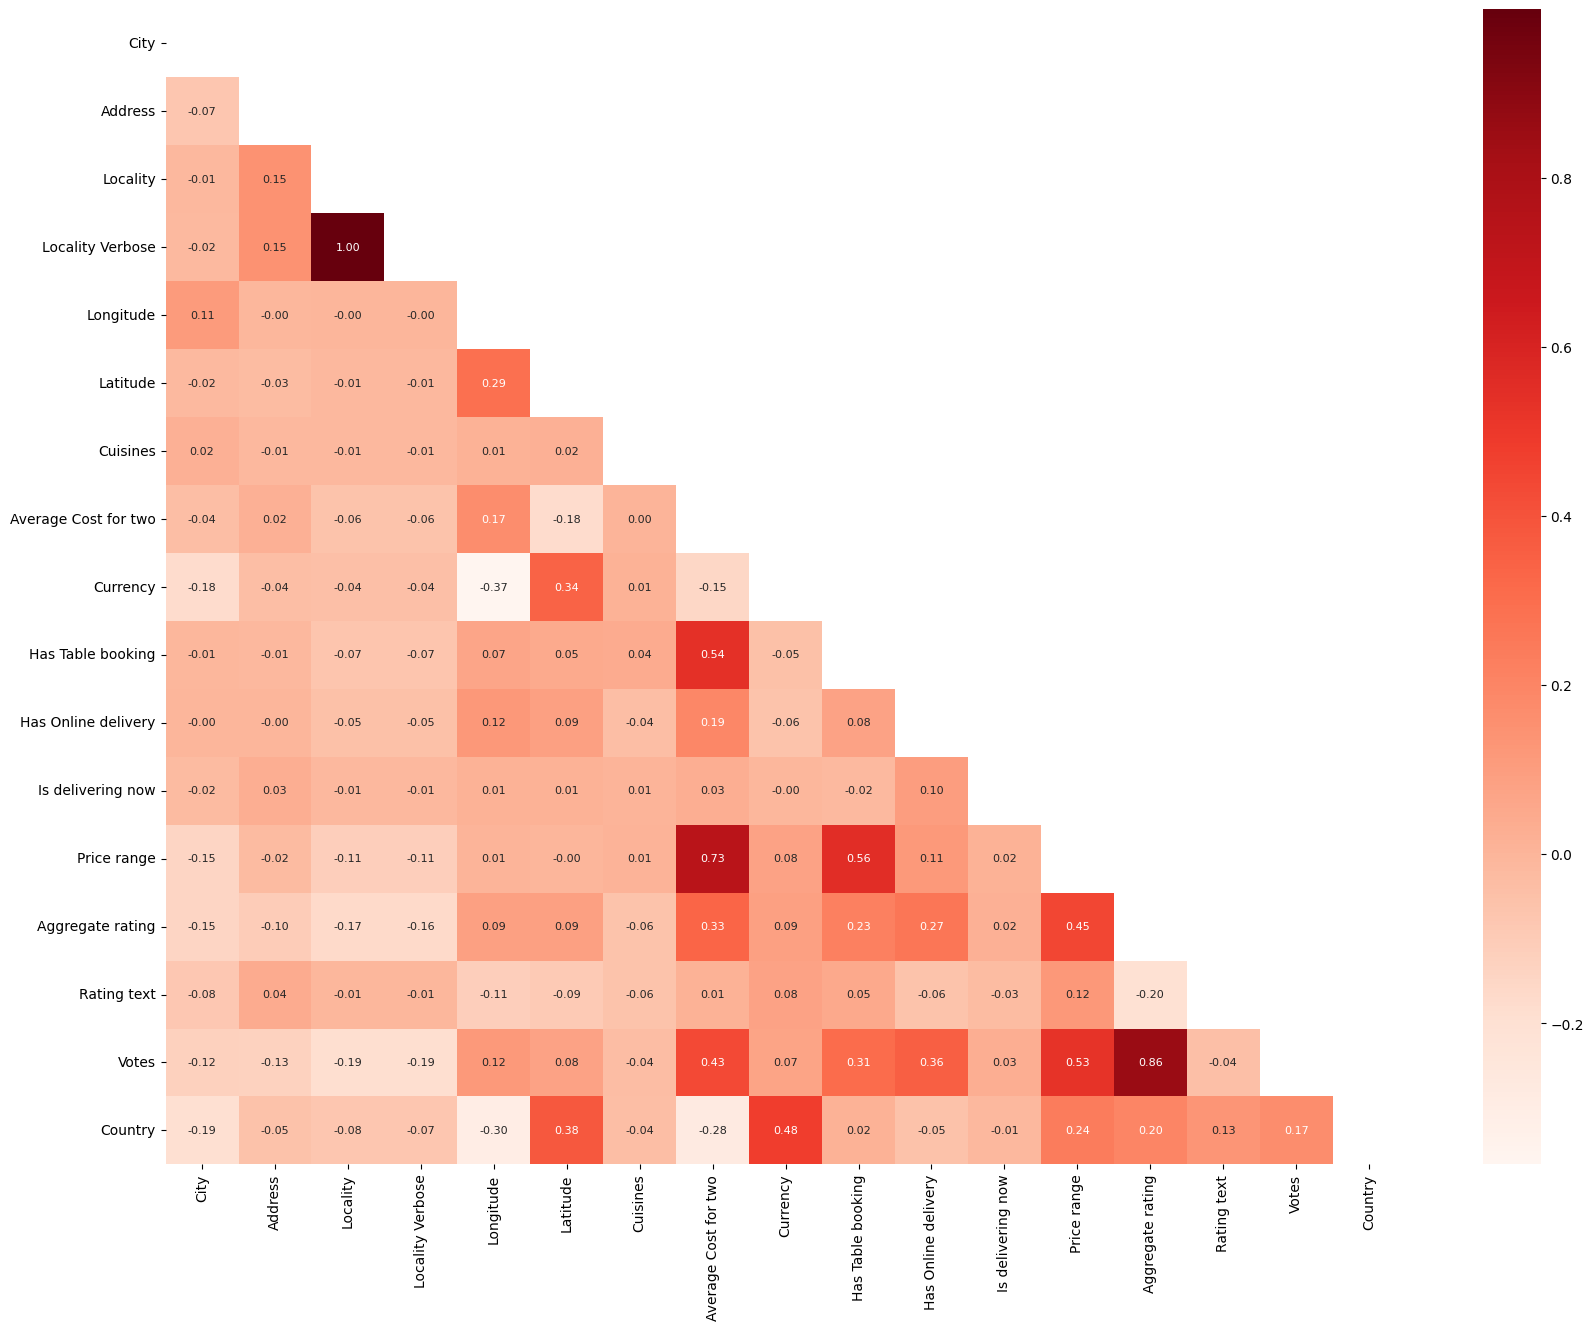

In [69]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 15))
palette = sns.color_palette("Reds", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=palette, mask=mask, annot_kws={'size': 8})
plt.show()

Most of the relationships are weak.<br>
There is a hundred percent correlation between Locality and Locality Verbose. SO we need to drop one of these columns.<br>
There is a strong relationship between Aggregate rating and Votes, Average Cost for two and Price range, Has Table booking and Price range, Average Cost for two and Has Table booking, and Price range and Votes. 

In [70]:
df.corr()['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.733156
Has Table booking       0.538185
Votes                   0.433872
Aggregate rating        0.333458
Has Online delivery     0.192374
Longitude               0.169160
Is delivering now       0.029197
Address                 0.018505
Rating text             0.014607
Cuisines                0.003594
City                   -0.036605
Locality Verbose       -0.057817
Locality               -0.059282
Currency               -0.148484
Latitude               -0.178741
Country                -0.277837
Name: Average Cost for two, dtype: float64

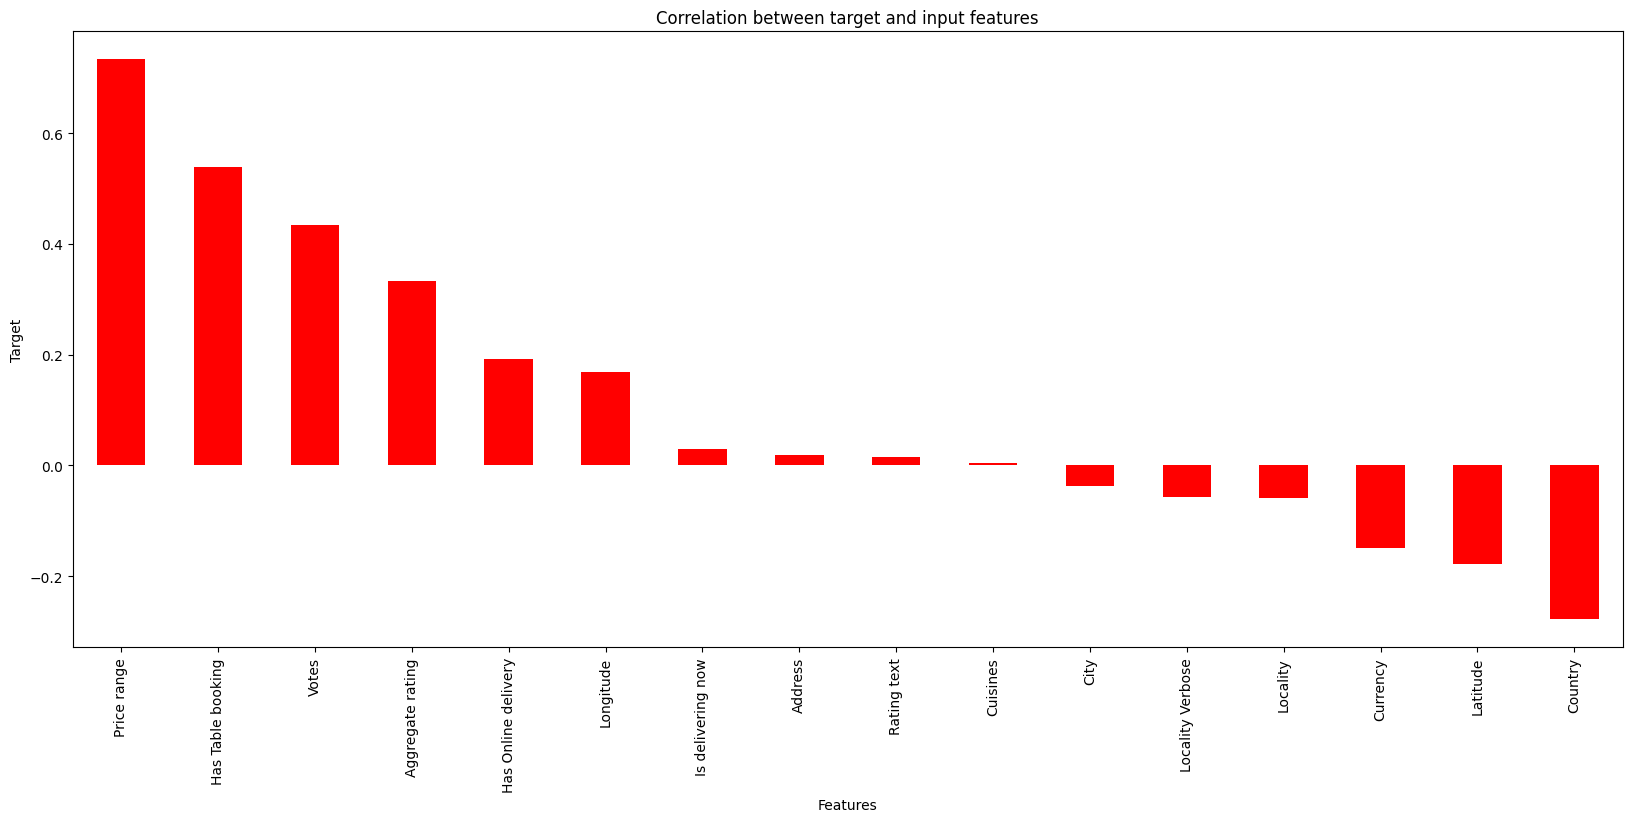

In [71]:
# Visualising the correlation between target and input features
plt.figure(figsize=(20, 8))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar', color='red')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

The target variable Average Cost for two has the strongest relationship with Price range, followed by Has Table booking.

In [72]:
df.corr()['Price range'].sort_values(ascending=False)

Price range             1.000000
Average Cost for two    0.733156
Has Table booking       0.555907
Votes                   0.528076
Aggregate rating        0.447102
Country                 0.236200
Rating text             0.120186
Has Online delivery     0.114600
Currency                0.077260
Is delivering now       0.016481
Cuisines                0.010874
Longitude               0.005374
Latitude               -0.002439
Address                -0.021549
Locality Verbose       -0.111872
Locality               -0.114817
City                   -0.145719
Name: Price range, dtype: float64

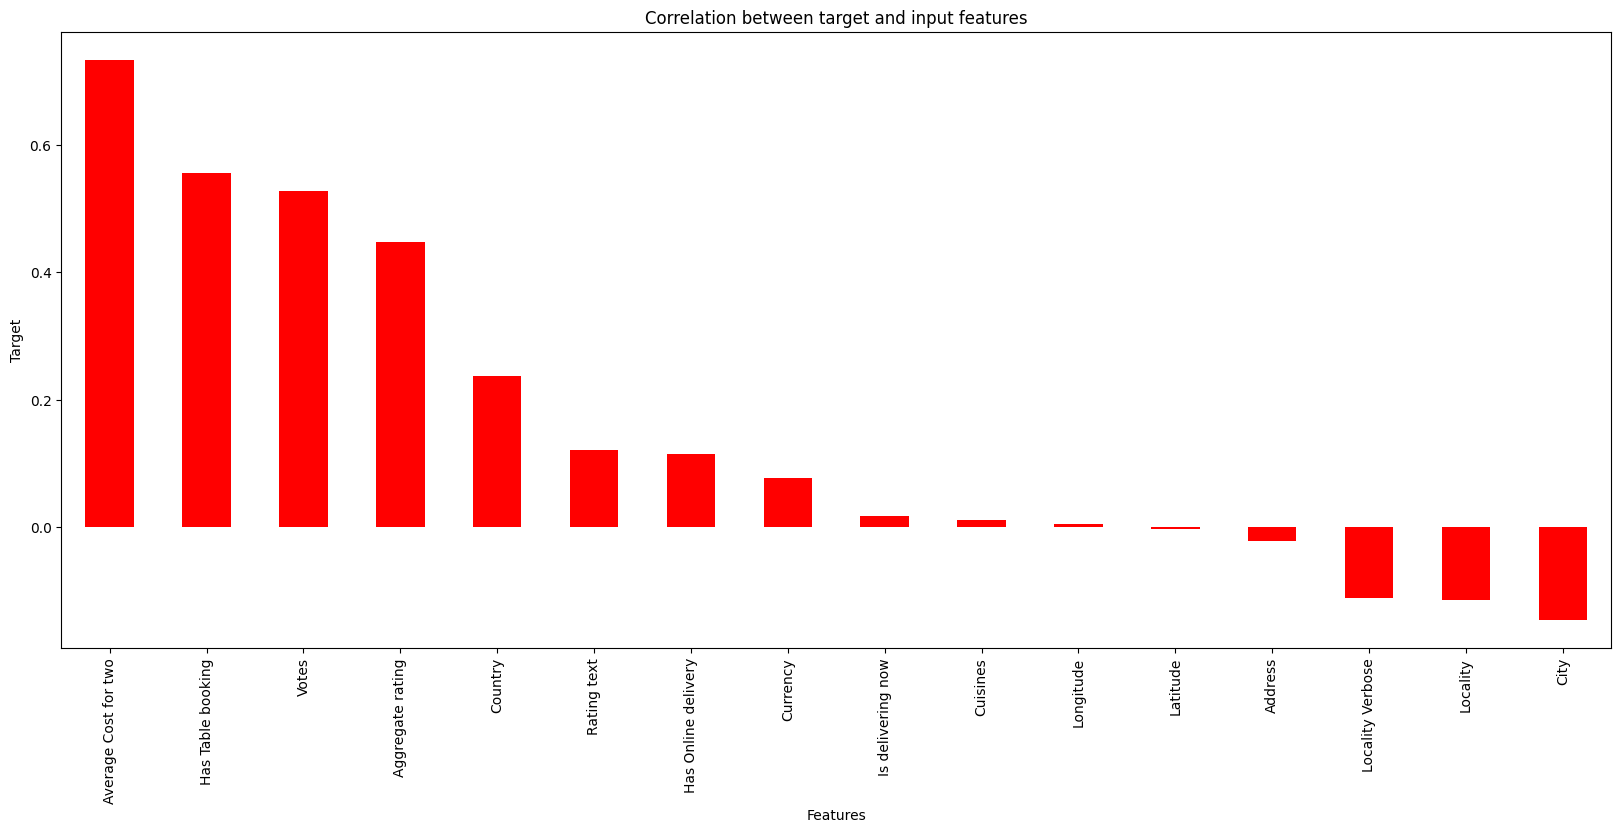

In [73]:
# Visualising the correlation between target and input features
plt.figure(figsize=(20, 8))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar', color='red')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

The target variable Price range has the strongest relationship with Average Cost for two, followed by Has Table booking and Votes

In [74]:
# Dropping Locality Verbose
df.drop(columns='Locality Verbose', inplace=True)

## Part 1: Predicting Average Cost for two

### Separating features and target

In [75]:
x = df.drop('Average Cost for two', axis=1)
y = df['Average Cost for two']

#### Feature scaling

In [76]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

City   Address  Locality  Longitude  Latitude  Cuisines  Currency  \
0 -0.434411  1.609908 -1.601631   6.296327 -1.864247 -0.186045 -6.358391   
1 -0.434411  0.530432 -0.258385   6.293947 -1.865574  0.163002 -6.358391   
2 -0.238969 -0.033664 -1.162252   6.301520 -1.862441  1.368156 -6.358391   
3 -0.238969  1.612045  0.570159   6.301457 -1.861998  0.188945 -6.358391   
4 -0.238969  1.611618  0.570159   6.301640 -1.862096  0.186586 -6.358391   

   Has Table booking  Has Online delivery  Is delivering now  Price range  \
0           2.646442             -0.61343          -0.062435     1.448044   
1           2.646442             -0.61343          -0.062435     1.448044   
2           2.646442             -0.61343          -0.062435     2.598282   
3          -0.377866             -0.61343          -0.062435     2.598282   
4           2.646442             -0.61343          -0.062435     2.598282   

   Aggregate rating  Rating text     Votes   Country  
0          1.928328    -0.410865  1.382904  1.711658  
1          1.607248    -0.410865  1.729422  1.711658  
2          1.502874     2.038936  1.300915  1.711658  
3          2.037983    -0.410865  1.464924  1.711658  
4          1.928328    -0.410865  1.211802  1.711658

### Checking Variance Inflation Factor (VIF)

In [77]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0                  City  1.094873
1               Address  1.053340
2              Locality  1.059495
3             Longitude  1.786605
4              Latitude  1.907785
5              Cuisines  1.020457
6              Currency  1.681537
7     Has Table booking  1.533771
8   Has Online delivery  1.214659
9     Is delivering now  1.014341
10          Price range  2.028686
11     Aggregate rating  4.485306
12          Rating text  1.231981
13                Votes  4.922792
14              Country  1.866819

The VIF values should be below 10. Here, we can observe that VIF values are all below 10, So there is no multicollinearity.

### Model Building

In [78]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Splitting data into train and test

In [79]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(0, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.8105394322052172
Random state for best accuracy: 93


In [80]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=max_rs)

#### Regression models

In [81]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost

In [82]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Support Vector Regressor', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('XGBoost', xgboost.XGBRegressor())
]

results = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((model_name, mae, rmse, r2))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2'])
df_results.sort_values('R2', ascending=False, inplace=True)

df_results

Model       MAE      RMSE        R2
4             Random Forest  0.393789  0.533376  0.877990
9                   XGBoost  0.397199  0.536163  0.876712
5               Extra Trees  0.401323  0.546520  0.871903
6         Gradient Boosting  0.414052  0.550268  0.870139
1  Support Vector Regressor  0.447037  0.617776  0.836322
8                     Ridge  0.487126  0.664640  0.810547
0         Linear Regression  0.487147  0.664653  0.810539
2                       KNN  0.504745  0.687526  0.797275
3             Decision Tree  0.511677  0.744280  0.762424
7                     Lasso  1.090633  1.467214  0.076758

Random Forest Regressor model seems to have the best R2 score on the test data. The Lasso model has the worst R2 score, which means its performance is bad.

#### Cross validation

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
results = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='r2') # Using fold value of 5
    mean_score = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    diff = abs(r2 - mean_score)
    
    results.append((model_name, mae, rmse, r2, mean_score, diff))


df_results = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2', 'CV R2', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model       MAE      RMSE        R2     CV R2  \
7                     Lasso  1.090633  1.467214  0.076758  0.075262   
6         Gradient Boosting  0.413276  0.548797  0.870833  0.839586   
5               Extra Trees  0.400671  0.546240  0.872034  0.840113   
2                       KNN  0.504745  0.687526  0.797275  0.761915   
4             Random Forest  0.390891  0.529055  0.879959  0.843270   
9                   XGBoost  0.397199  0.536163  0.876712  0.838695   
1  Support Vector Regressor  0.447037  0.617776  0.836322  0.796677   
0         Linear Regression  0.487147  0.664653  0.810539  0.759609   
8                     Ridge  0.487126  0.664640  0.810547  0.759610   
3             Decision Tree  0.503611  0.730914  0.770881  0.707408   

   Difference  
7    0.001496  
6    0.031247  
5    0.031921  
2    0.035361  
4    0.036688  
9    0.038016  
1    0.039645  
0    0.050931  
8    0.050937  
3    0.063473

The Lasso model has the worst R2 score, so we need to discard it. The Random Forest Regressor model has very less difference between cross validation R2 and test R2 scores. So we can tune the Random Forest model.

#### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

##### Random Forest

In [86]:
params = {
    'max_depth': [10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 20, 50, 100, 200],
    'max_features': ['auto', 'sqrt']
    }

In [87]:
gcv = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='r2')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 200]},
             scoring='r2')

In [88]:
best_params = gcv.best_params_
best_params

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [89]:
model_rf = RandomForestRegressor(**best_params)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 0.3940107875752424
Root Mean Squared Error: 0.5283659922358126
R2 Score: 0.8802712312689933


The R2 score is 88.03%

### Saving the model

In [90]:
import pickle

In [91]:
filename = 'zomato_regression_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

#### Predicting using the saved model

In [92]:
model = pickle.load(open('zomato_regression_model.pkl', 'rb'))

pred = model.predict(x_test)

In [93]:
pred_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
pred_df.head(25)

Actual  Predicted
0    8.269471   8.225847
1    5.896609   7.375422
2    9.592226   9.708152
3    7.747915   7.177177
4    9.031664   8.968645
5    8.269471   7.571504
6    5.546935   5.634159
7    9.592226   8.939113
8   10.576851  10.703407
9    8.025429   7.240701
10   8.684956   8.984667
11   3.865982   3.549795
12   8.684956   8.877334
13   8.684956   8.893038
14   9.031664   9.006910
15   5.896609   5.801460
16   9.031664   9.037563
17   8.487575   8.081054
18  11.492643  11.473581
19   8.684956   9.089818
20   5.896609   7.714015
21  10.038654   9.790481
22   7.747915   7.965273
23  10.411113  10.718114
24   8.025429   7.908673

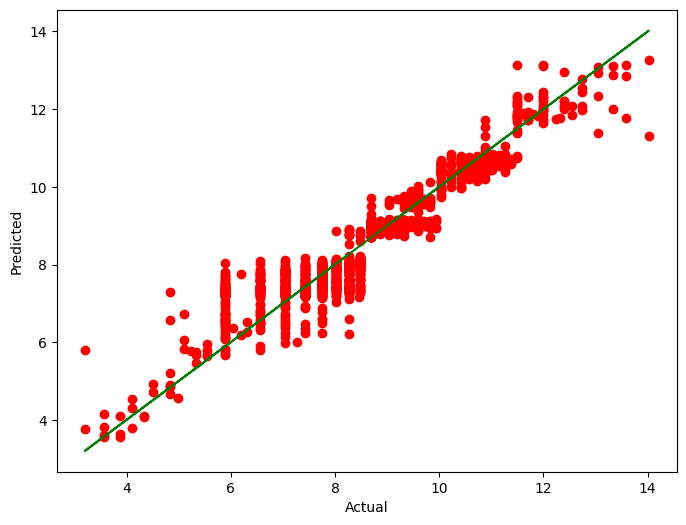

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=pred, color='r')
plt.plot(y_test, y_test, color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

These are the final predictions.

## Part 2: Predicting the Price range

In [95]:
df['Price range'] = df['Price range'].apply(lambda x: x-1)
df

City  Address  Locality     Longitude    Latitude  Cuisines  \
0     34.0   7911.0     130.0  22790.560649   65.548565     692.0   
1     34.0   5385.0     451.0  22784.895234   65.462552     840.0   
2     36.0   4065.0     235.0  22802.918144   65.665629    1351.0   
3     36.0   7916.0     649.0  22802.767955   65.694349     851.0   
4     36.0   7915.0     649.0  22803.203757   65.687979     850.0   
...    ...      ...       ...           ...         ...       ...   
9546  64.0   5260.0     395.0    956.876112  366.481110    1467.0   
9547  64.0   5294.0     423.0    961.490723  366.285977    1476.0   
9548  64.0   5298.0     425.0    961.009428  366.979055     839.0   
9549  64.0   5299.0     425.0    961.109113  367.011662    1342.0   
9550  64.0   3651.0     507.0    960.386145  365.908222     188.0   

      Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0                10.232487       0.0                1.0                  0.0   
1                10.411113       0.0                1.0                  0.0   
2                13.053851       0.0                1.0                  0.0   
3                10.876581       0.0                0.0                  0.0   
4                10.876581       0.0                1.0                  0.0   
...                    ...       ...                ...                  ...   
9546              5.546935       8.0                0.0                  0.0   
9547              5.974232       8.0                0.0                  0.0   
9548              6.763519       8.0                0.0                  0.0   
9549              6.188826       8.0                0.0                  0.0   
9550              4.979404       8.0                0.0                  0.0   

      Is delivering now  Price range  Aggregate rating  Rating text     Votes  \
0                   0.0            2         11.047522          1.0  6.095866   
1                   0.0            2         10.044624          1.0  6.808049   
2                   0.0            3          9.718611          5.0  5.927358   
3                   0.0            3         11.390032          1.0  6.264439   
4                   0.0            3         11.047522          1.0  5.744210   
...                 ...          ...               ...          ...       ...   
9546                0.0            2          8.765750          5.0  7.135284   
9547                0.0            2          9.079149          5.0  7.446169   
9548                0.0            3          7.554951          2.0  6.935137   
9549                0.0            3          8.456605          5.0  7.288400   
9550                0.0            1          8.456605          5.0  6.808049   

      Country  
0         2.0  
1         2.0  
2         2.0  
3         2.0  
4         2.0  
...       ...  
9546      6.0  
9547      6.0  
9548      6.0  
9549      6.0  
9550      6.0  

[8756 rows x 16 columns]

### Separating features and target

In [96]:
x = df.drop('Price range', axis=1)
y = df['Price range']

#### Feature scaling

In [97]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

City   Address  Locality  Longitude  Latitude  Cuisines  \
0 -0.434411  1.609908 -1.601631   6.296327 -1.864247 -0.186045   
1 -0.434411  0.530432 -0.258385   6.293947 -1.865574  0.163002   
2 -0.238969 -0.033664 -1.162252   6.301520 -1.862441  1.368156   
3 -0.238969  1.612045  0.570159   6.301457 -1.861998  0.188945   
4 -0.238969  1.611618  0.570159   6.301640 -1.862096  0.186586   

   Average Cost for two  Currency  Has Table booking  Has Online delivery  \
0              1.155715 -6.358391           2.646442             -0.61343   
1              1.275163 -6.358391           2.646442             -0.61343   
2              3.042388 -6.358391           2.646442             -0.61343   
3              1.586426 -6.358391          -0.377866             -0.61343   
4              1.586426 -6.358391           2.646442             -0.61343   

   Is delivering now  Aggregate rating  Rating text     Votes   Country  
0          -0.062435          1.928328    -0.410865  1.382904  1.711658  
1          -0.062435          1.607248    -0.410865  1.729422  1.711658  
2          -0.062435          1.502874     2.038936  1.300915  1.711658  
3          -0.062435          2.037983    -0.410865  1.464924  1.711658  
4          -0.062435          1.928328    -0.410865  1.211802  1.711658

### Checking Variance Inflation Factor (VIF)

In [98]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0                   City  1.093080
1                Address  1.055091
2               Locality  1.059629
3              Longitude  1.792121
4               Latitude  1.910837
5               Cuisines  1.019563
6   Average Cost for two  2.027810
7               Currency  1.689865
8      Has Table booking  1.532595
9    Has Online delivery  1.215243
10     Is delivering now  1.014442
11      Aggregate rating  4.480555
12           Rating text  1.221175
13                 Votes  4.925244
14               Country  1.950460

The VIF values should be below 10. Here, we can observe that VIF values are below 10. So there is no multicollinearity.

### Model Building

In [99]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [100]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.2,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression(multi_class='multinomial')
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.9537671232876712
Random state for best accuracy: 93


In [101]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Checking for class imbalance

In [102]:
y_train.value_counts()

0    3434
1    2304
2     912
3     354
Name: Price range, dtype: int64

There seems to be class imbalance, and all regions are almost equally represented.

#### Oversampling using SMOTE

In [103]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [104]:
y1.value_counts()

1    3434
0    3434
2    3434
3    3434
Name: Price range, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification models

In [105]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [106]:
models = [
    ('Logistic Regression', LogisticRegression(multi_class='multinomial')),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

Model  Accuracy
9                     XGBoost  0.988584
10                   CatBoost  0.988014
8           Gradient Boosting  0.981164
3               Decision Tree  0.980023
4               Random Forest  0.980023
6                 Extra Trees  0.951484
0         Logistic Regression  0.948059
1   Support Vector Classifier  0.943493
2                         KNN  0.828767
7                    AdaBoost  0.816210
5        Gaussian Naive Bayes  0.507420

Based on the above results, XGBoost and CatBoost model performs the best on the test data, while Gaussian Naive Bayes model performs the worst and needs to be discarded.

#### Confusion matrices

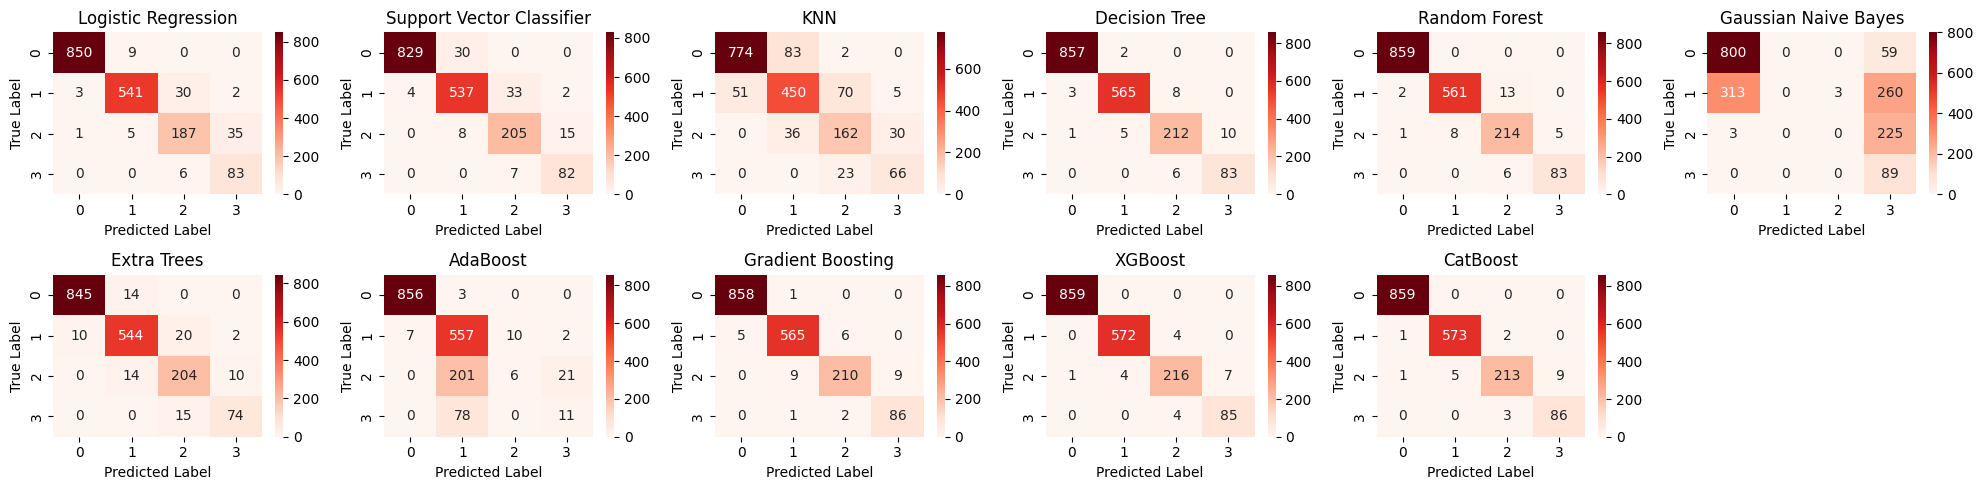

In [107]:
plt.figure(figsize=(20, 5))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 6, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification Reports

In [108]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       859
           1       0.97      0.94      0.96       576
           2       0.84      0.82      0.83       228
           3       0.69      0.93      0.79        89

    accuracy                           0.95      1752
   macro avg       0.88      0.92      0.89      1752
weighted avg       0.95      0.95      0.95      1752

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       859
           1       0.93      0.93      0.93       576
           2       0.84      0.90      0.87       228
           3       0.83      0.92      0.87        89

    accuracy                           0.94      1752
   macro avg       0.90      0.93      0.91      1752
weighted avg       0.95      0.94      0.94      1752

-----------------------

The XGBoost Classifier seem to have good precision and recall values too.

#### Using Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model  CV Accuracy  Accuracy  Difference
8           Gradient Boosting     0.976728  0.981164    0.004436
3               Decision Tree     0.973872  0.980594    0.006721
10                   CatBoost     0.980726  0.988014    0.007288
4               Random Forest     0.971588  0.978881    0.007293
9                     XGBoost     0.981011  0.988584    0.007573
0         Logistic Regression     0.938464  0.948059    0.009595
6                 Extra Trees     0.932753  0.949201    0.016448
1   Support Vector Classifier     0.927043  0.943493    0.016450
7                    AdaBoost     0.834240  0.816210    0.018030
5        Gaussian Naive Bayes     0.527555  0.507420    0.020135
2                         KNN     0.795831  0.828767    0.032936

As we can observe, The XGBoost model does not overfit much and performs well on both teat and cross validation data. So, we can finetune this model.

#### Hyperparameter Tuning

In [111]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

##### XGBoost

In [112]:
params = {
    'max_depth': [1, 2, 3, 5, 6, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.2, 0.5, 0.7, 1],
    'n_estimators': [10, 50, 100, 200]
    }

In [113]:
gcv = GridSearchCV(xgboost.XGBClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 2, 3, 5, 6, 7, 10],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [0.2, 0.5, 0.7, 1]},
             scoring='accuracy')

In [114]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}

In [115]:
model_xg = xgboost.XGBClassifier(**best_params)
model_xg.fit(x1, y1)
y_pred_xg = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)

0.9885844748858448


The accuracy of the model is 98.86%

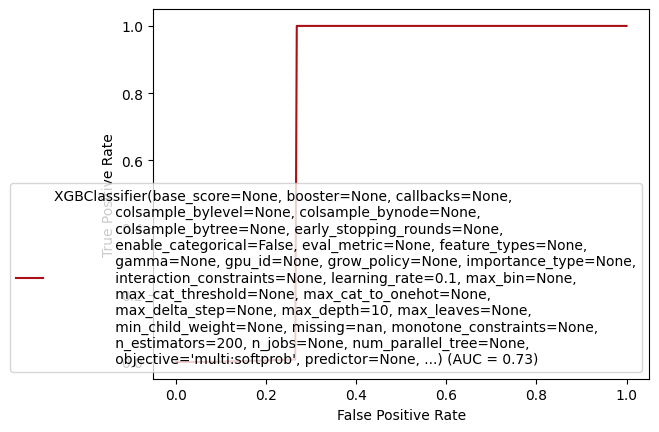

In [117]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg, pos_label=True)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_xg)
display.plot()
plt.show()

The AUC value of the model is 0.73

### Saving the model

In [120]:
filename = 'zomato_classification_model.pkl'
pickle.dump(model_xg, open(filename, 'wb'))

#### Predicting using the saved model

In [121]:
model = pickle.load(open('zomato_classification_model.pkl', 'rb'))

pred = model.predict(x_test)

In [122]:
test_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
test_df

Actual  Predicted
0          1          1
1          0          0
2          0          0
3          3          3
4          0          0
...      ...        ...
1747       0          0
1748       0          0
1749       0          0
1750       0          0
1751       0          0

[1752 rows x 2 columns]

These are the final predictions.

In [123]:
test_df.to_csv('zomato_pricerange_predictions.csv')